In [ ]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
import torch
from utils import *

In [6]:
REZ_DIR = "results"

## Logic

In [62]:
def plot_rez(rez_dict):
    
    y_test = rez_dict[0]['y_test']
    y_pred = rez_dict[0]['y_pred']
    preds = rez_dict[0]['y_pred_proba']
    differences = np.abs(y_test - y_pred)
    
    plt.figure(figsize=(15, 5))
    plt.imshow(differences, cmap='hot', interpolation='nearest', aspect='auto', vmin=-1, vmax=1)
    plt.title('Differences between y_test and y_pred')
    plt.xlabel('Labels')
    plt.ylabel('Samples')
    plt.colorbar()
    plt.show()
    
    num_attributes = y_test.shape[1]
    for i in range(num_attributes):
        label_accuracies = np.mean(y_test[:, i] == y_pred[:, i])
        plt.figure(figsize=(10, 5))
        if len(preds.shape) == 2:
            plt.hist(preds[y_test[:, i] == 0, i], bins=50, alpha=0.75, color='blue', label='y_test=0')
            plt.hist(preds[y_test[:, i] == 1, i], bins=50, alpha=0.75, color='red', label='y_test=1')
            plt.title(f'Histogram of Prediction Probabilities for Attribute {i} with acc {label_accuracies:.4f}')
            plt.xlabel('Probability')
            plt.ylabel('Frequency')
            plt.legend()
            plt.show()
        elif len(preds.shape) == 3:
            plt.hist(preds[y_test[:, i] == 0, i, 0], bins=50, alpha=0.75, color='blue', label='y_test=0')
            plt.hist(preds[y_test[:, i] == 1, i, 1], bins=50, alpha=0.75, color='red', label='y_test=1')
            plt.title(f'Histogram of Prediction Probabilities for Attribute {i} with acc {label_accuracies:.4f}')
            plt.xlabel('Probability')
            plt.ylabel('Frequency')
            plt.legend()
            plt.show()

    plt.clf

In [63]:
def read_rez(exp_name):
    with open(os.path.join(REZ_DIR, exp_name + ".pkl"), 'rb') as handle:
        rez_dict = pickle.load(handle)

    plot_rez(rez_dict) # only first run visualized
    
    sub_accuracy = []
    macro_f1 = []
    micro_f1 = []
    ham_loss = []   

    label_accuracies_list = []

    for run in rez_dict.keys():
        y_test = rez_dict[run]['y_test']
        y_pred = rez_dict[run]['y_pred']
    
        sub_accuracy.append(1-rez_dict[run]['01_loss'])
        macro_f1.append(f1_score(y_test, y_pred, average='macro'))
        micro_f1.append(f1_score(y_test, y_pred, average='micro'))
        ham_loss.append(hamming_loss(y_test, y_pred))

        label_accuracies = np.mean(y_test == y_pred, axis=0)
        label_accuracies_list.append(label_accuracies)

    label_accuracies_mean = np.mean(label_accuracies_list, axis=0)
    label_accuracies_ci = confidence_interval(label_accuracies_list)

    print('SA Mean: {}, SA CI: {}'.format(confidence_interval(sub_accuracy)[0], confidence_interval(sub_accuracy)[1])) 
    print('Micro F1 Mean: {}, Micro F1 CI: {}'.format(confidence_interval(micro_f1)[0], confidence_interval(micro_f1)[1])) 
    print('Macro F1 Mean: {}, Macro F1 CI: {}'.format(confidence_interval(macro_f1)[0], confidence_interval(macro_f1)[1])) 
    print('Hamming Loss Mean: {}, Hamming Loss CI: {}'.format(confidence_interval(ham_loss)[0], confidence_interval(ham_loss)[1])) 
    print('Label Accuracies Mean: {}'.format(label_accuracies_mean))
    print('Label Accuracies CI: {}'.format(label_accuracies_ci))



## BRCC - paper

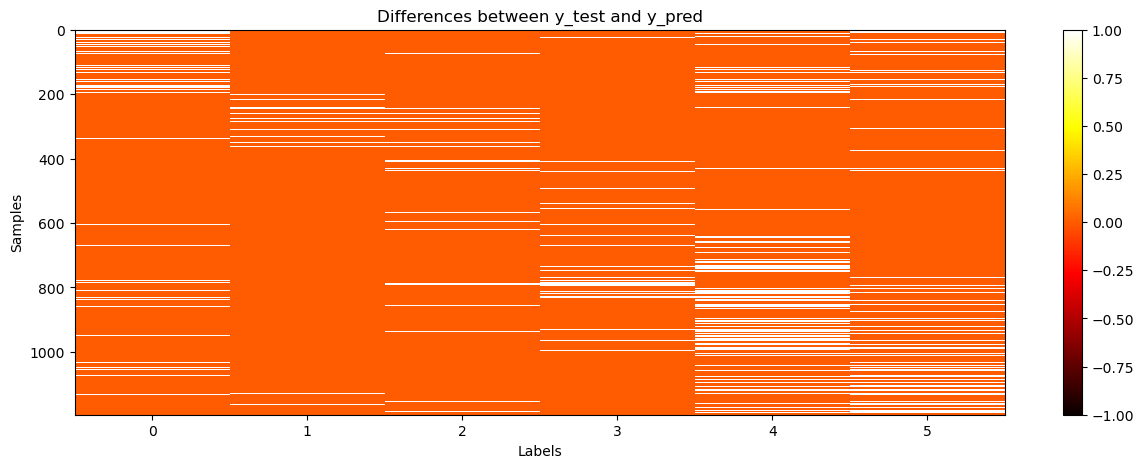

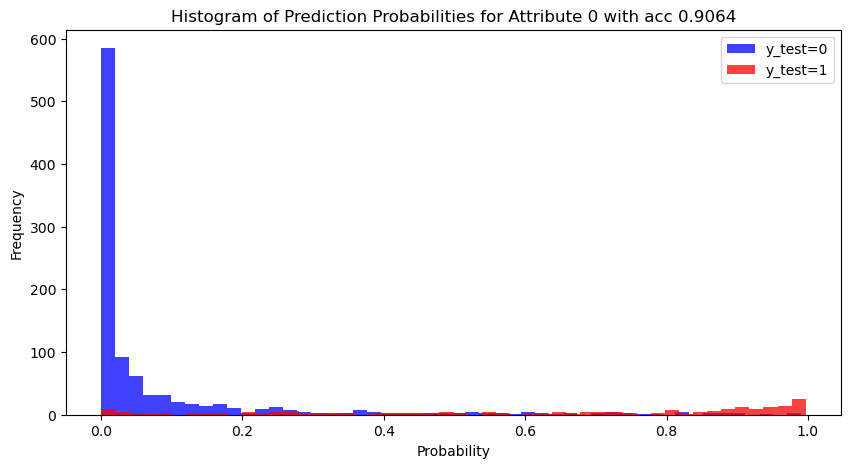

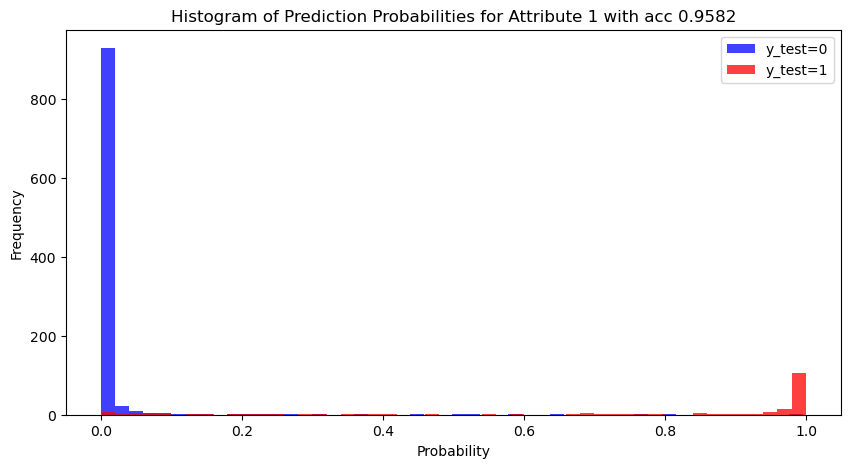

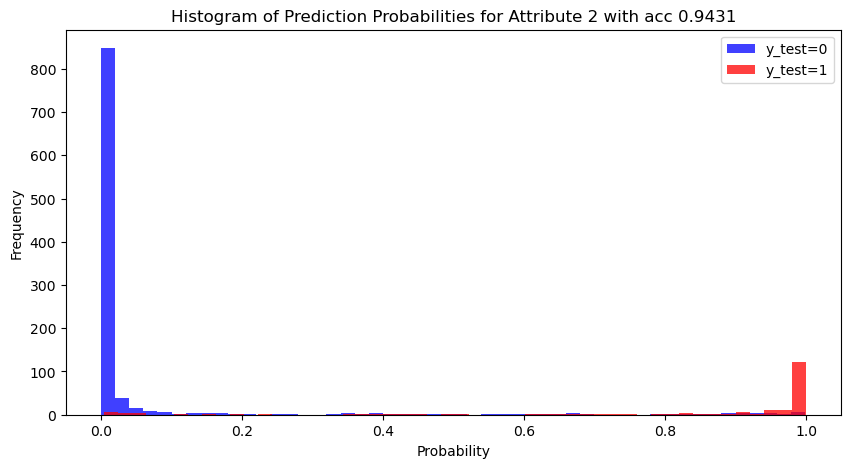

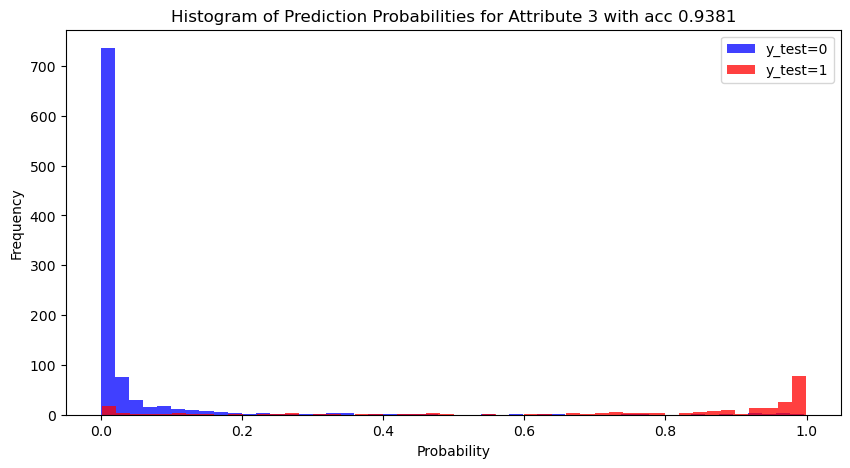

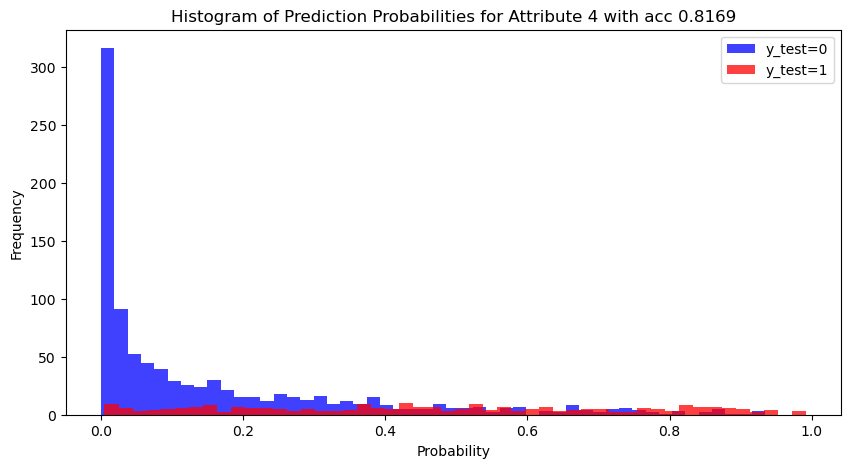

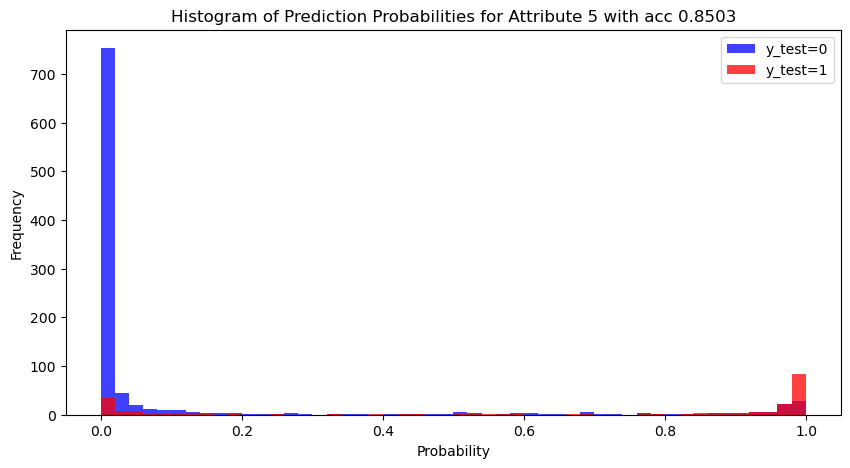

SA Mean: 0.6494983277591972, SA CI: 0.007607816908450552
Micro F1 Mean: 0.7176454396102336, Micro F1 CI: 0.0055275234650106
Macro F1 Mean: 0.7235162014138832, Macro F1 CI: 0.005866171639565886
Hamming Loss Mean: 0.0991917502787068, Hamming Loss CI: 0.002019343555684429
Label Accuracies Mean: [0.90668896 0.95685619 0.93913043 0.9361204  0.81421405 0.85183946]
Label Accuracies CI: (0.9008082497212933, array([0.0033319 , 0.00239007, 0.00339598, 0.00239007, 0.00212764,
       0.00565785]))


In [30]:
read_rez("scene_brcc_results_mine")

## BRCC - no parents

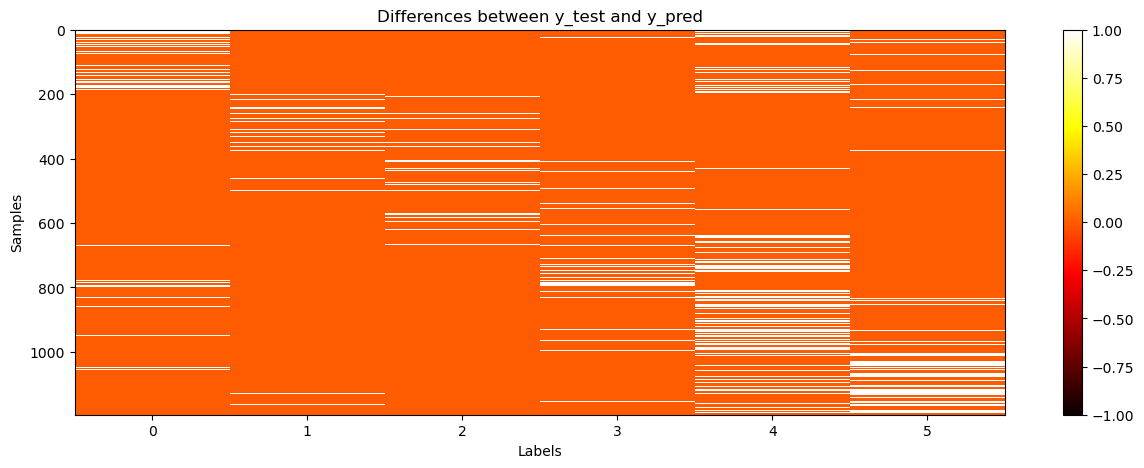

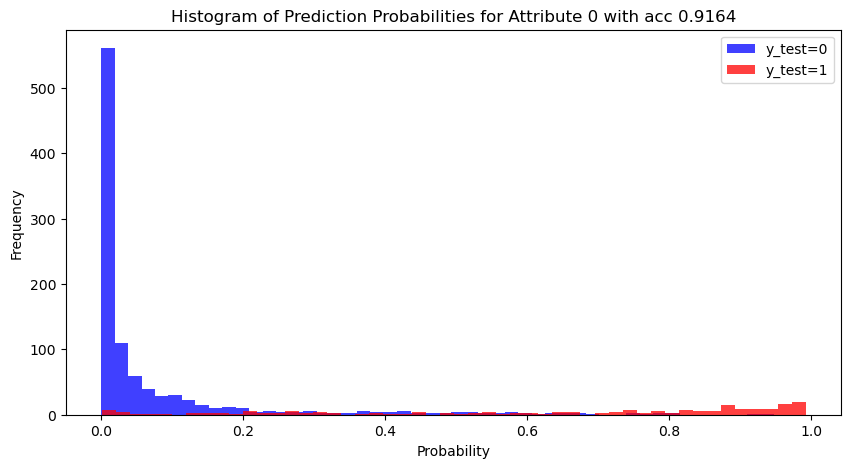

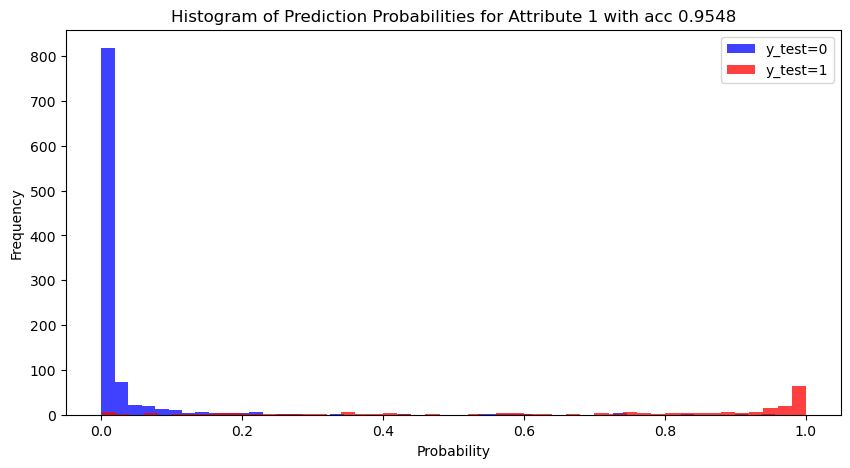

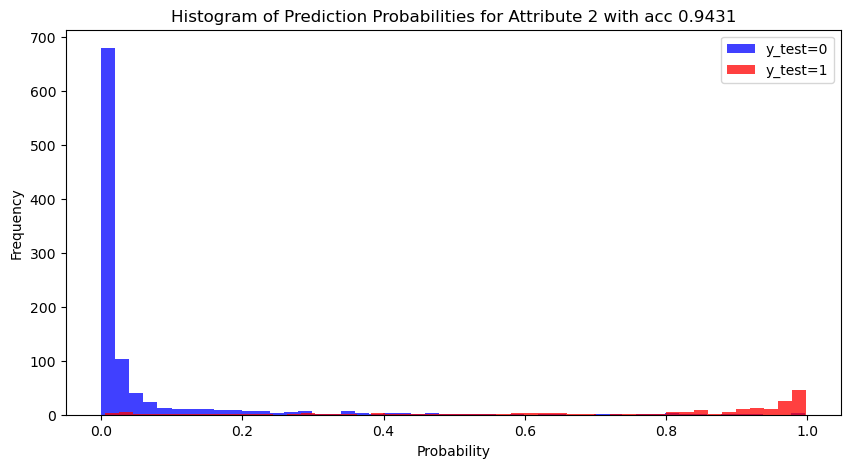

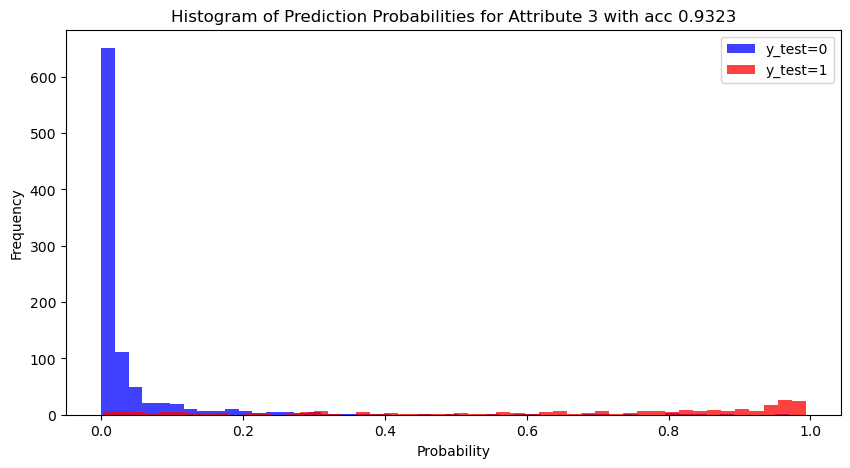

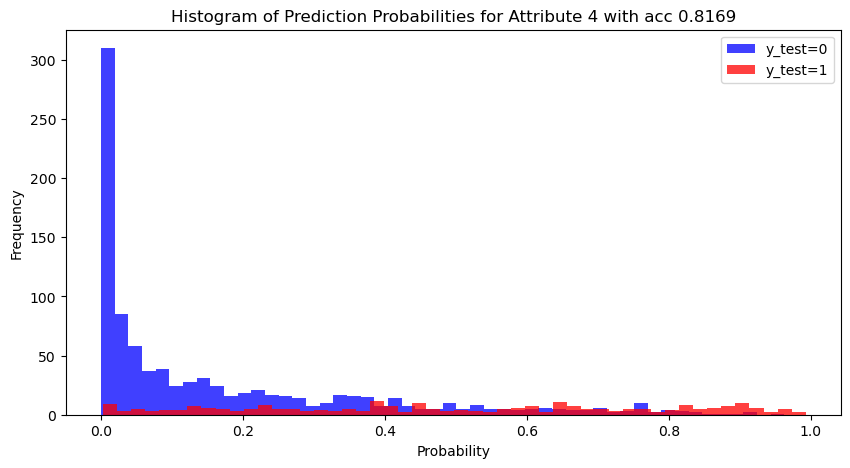

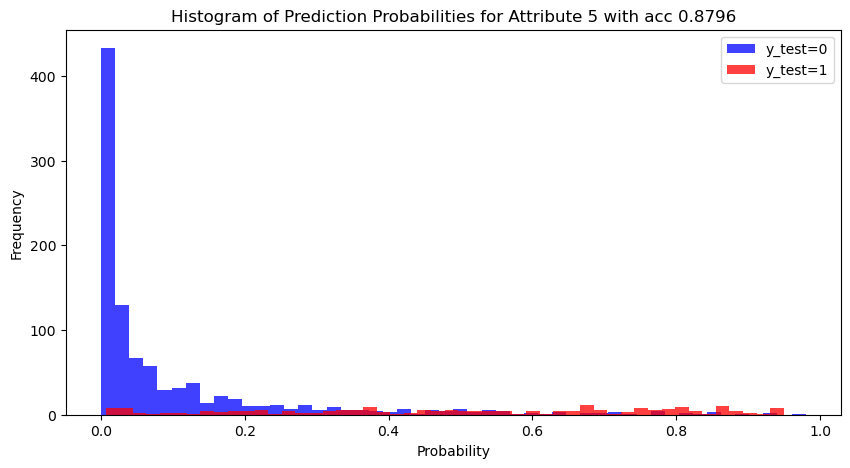

SA Mean: 0.6067447045707915, SA CI: 0.005227098226838116
Micro F1 Mean: 0.7254994884578595, Micro F1 CI: 0.00904877712258703
Macro F1 Mean: 0.7302731689054877, Macro F1 CI: 0.008545164418263421
Hamming Loss Mean: 0.09132292827945003, Hamming Loss CI: 0.003484732151225351
Label Accuracies Mean: [0.91583055 0.95568562 0.94342252 0.93283166 0.81911929 0.8851728 ]
Label Accuracies CI: (0.9086770717205499, array([0.0043237 , 0.00359754, 0.00119918, 0.00239836, 0.0052271 ,
       0.01458864]))


In [31]:
read_rez("scene_brcc_results_noparents")

## BRCC - wrong

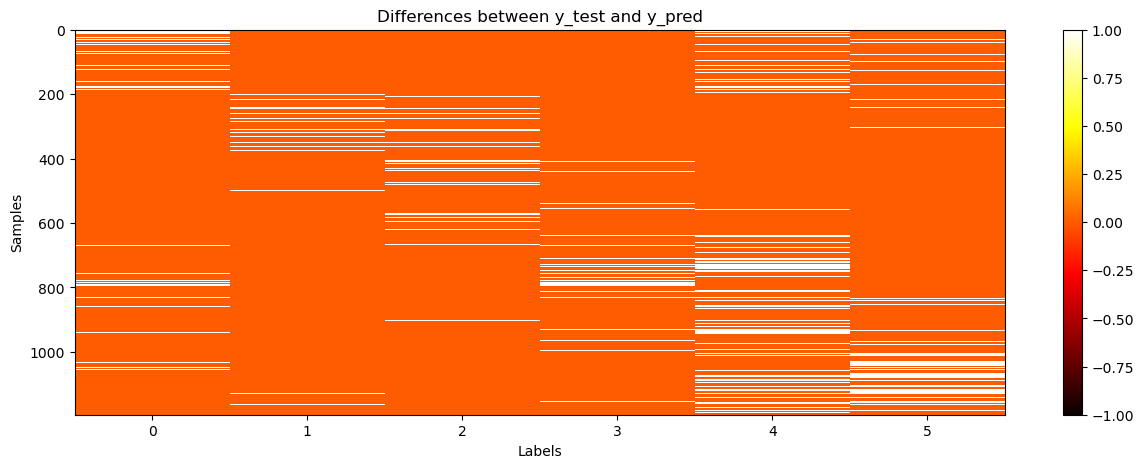

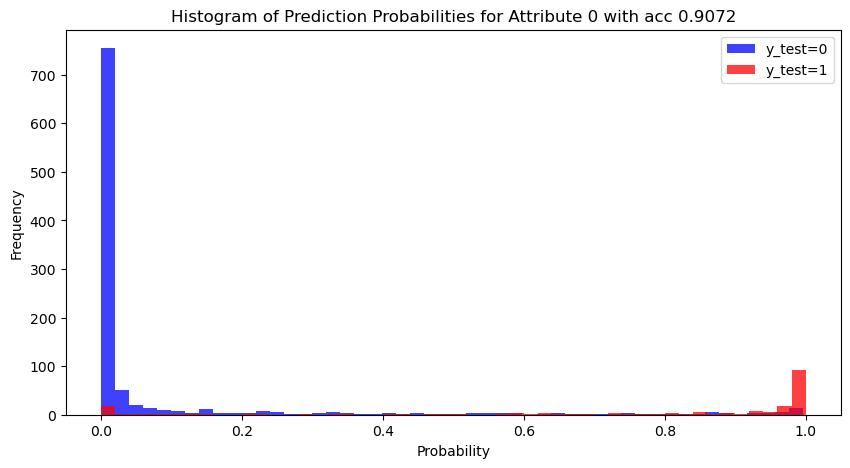

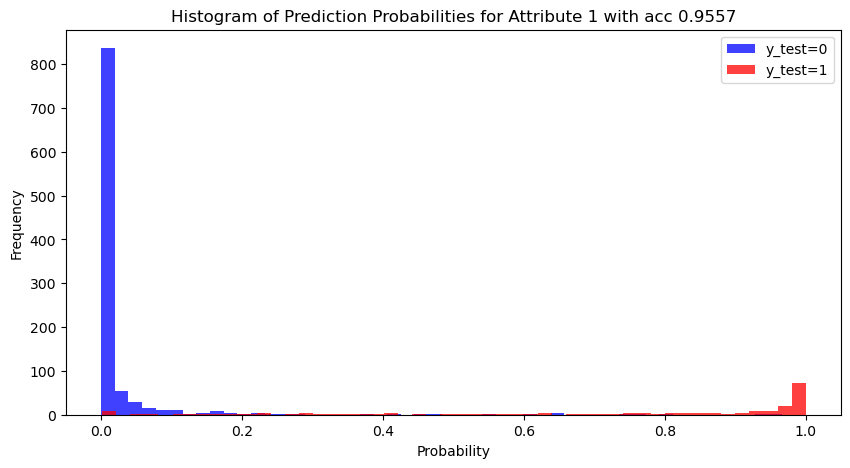

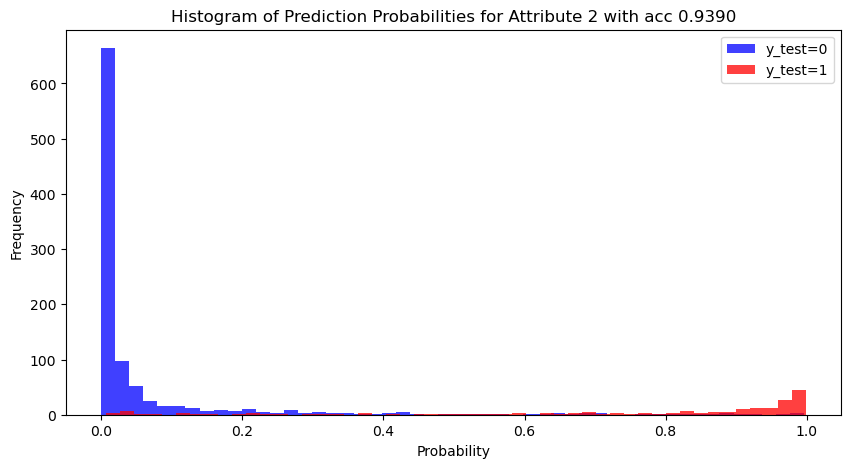

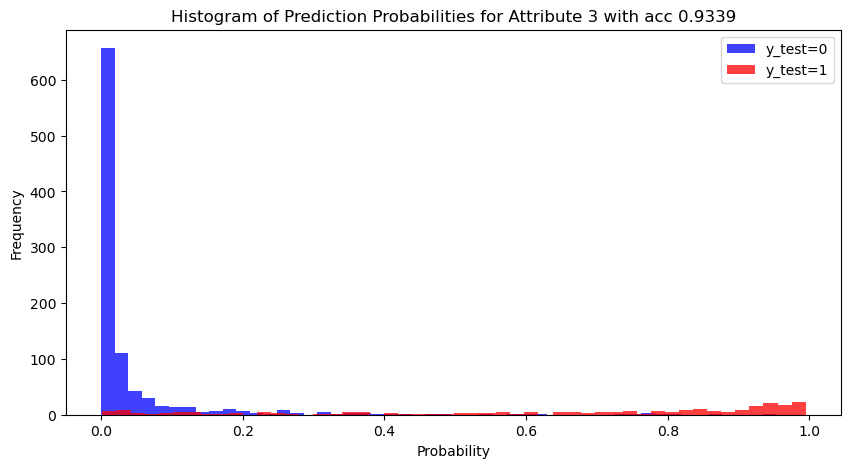

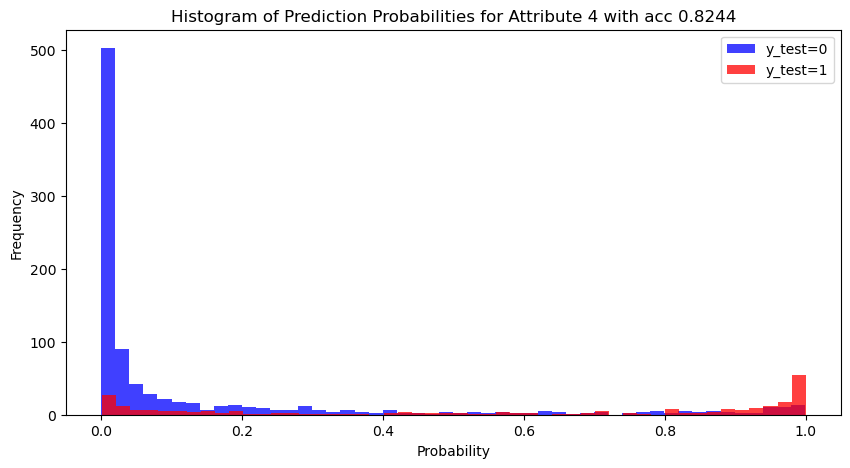

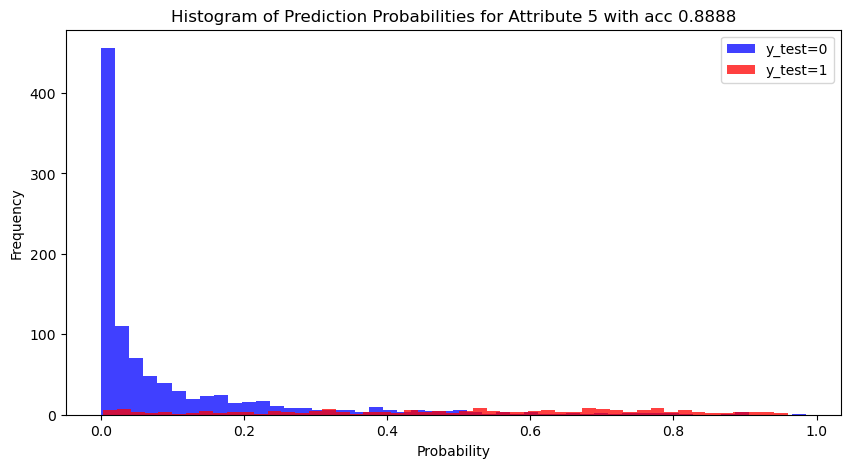

SA Mean: 0.6243032329988852, SA CI: 0.007294318507547732
Micro F1 Mean: 0.7326288122330666, Micro F1 CI: 0.0069954727837185935
Macro F1 Mean: 0.7391736456224054, Macro F1 CI: 0.006986423131525213
Hamming Loss Mean: 0.09211259754738015, Hamming Loss CI: 0.0009158877658371012
Label Accuracies Mean: [0.91164994 0.95568562 0.93979933 0.93227425 0.82051282 0.88740245]
Label Accuracies CI: (0.9078874024526199, array([0.01143943, 0.00207704, 0.00359754, 0.00359754, 0.00839425,
       0.0043237 ]))


In [40]:
read_rez("scene_brcc_results_wrong")

## Softmax

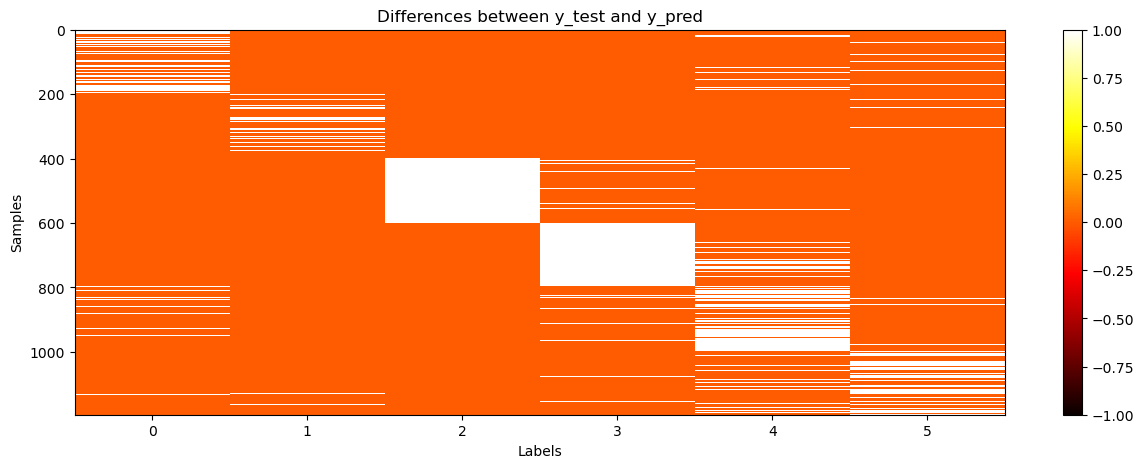

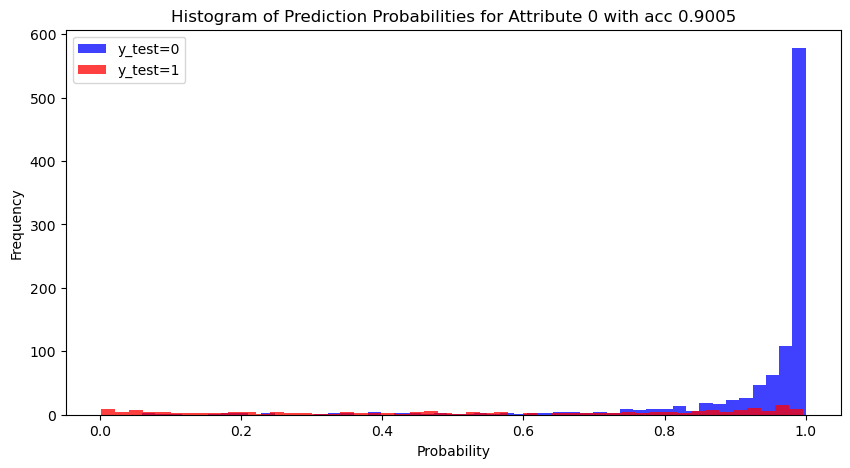

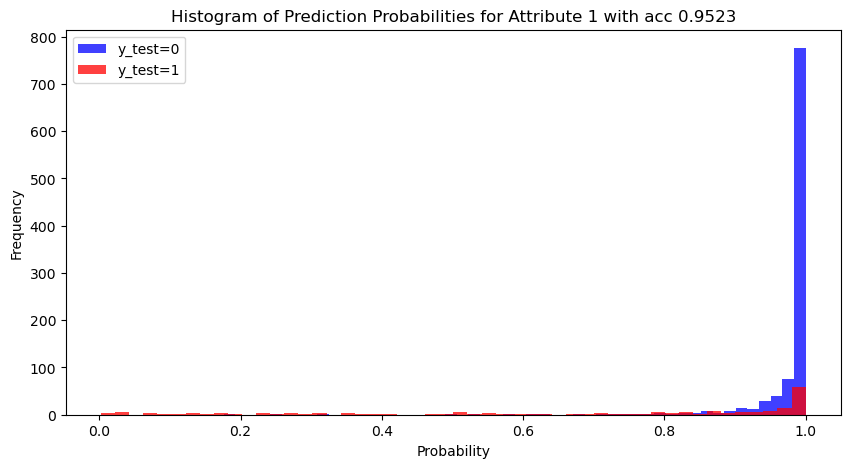

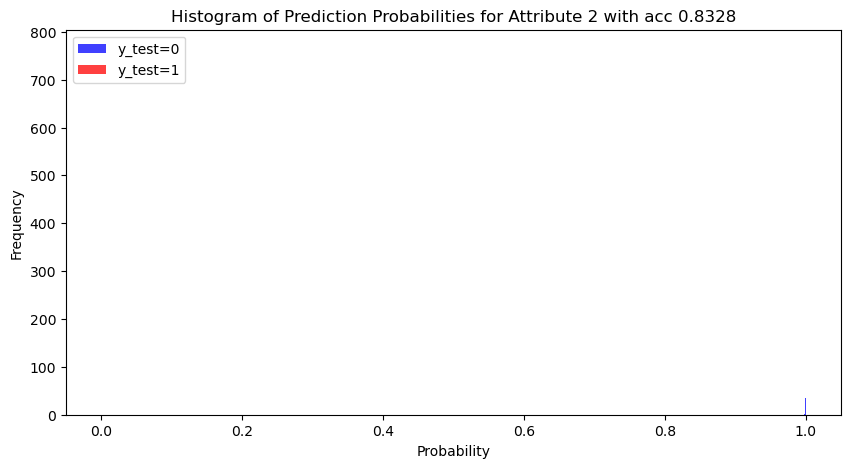

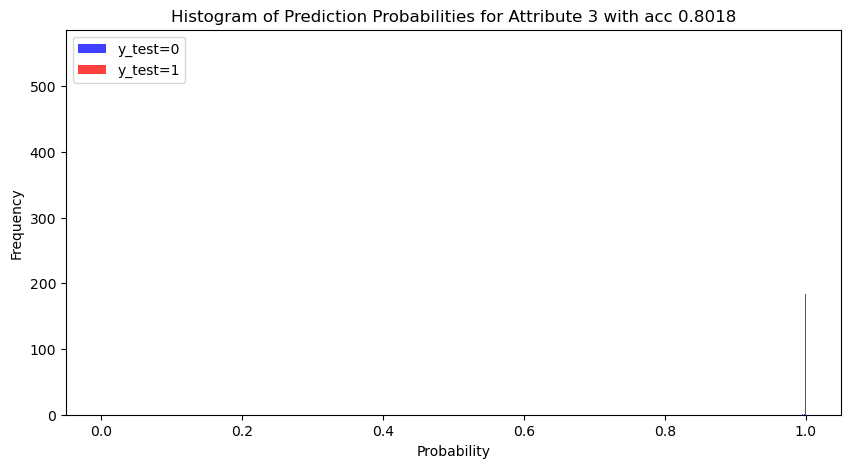

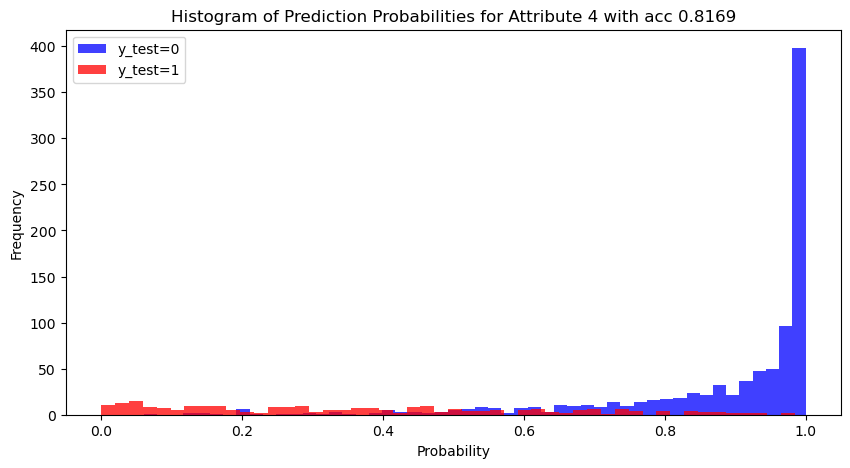

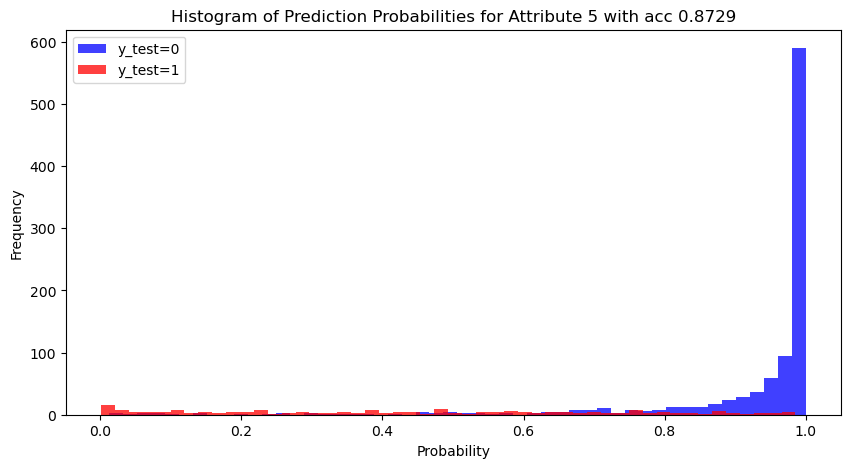

SA Mean: 0.2591973244147157, SA CI: 0.16485979785067684
Micro F1 Mean: 0.40290158019550865, Micro F1 CI: 0.1929768721351905
Macro F1 Mean: 0.3487337674816134, Macro F1 CI: 0.20046897769476296
Hamming Loss Mean: 0.14571720549981418, Hamming Loss CI: 0.027677250511430575
Label Accuracies Mean: [0.90050167 0.90802676 0.83277592 0.80183946 0.81354515 0.8690078 ]
Label Accuracies CI: (0.8542827945001857, array([0.00415408, 0.16106089, 0.        , 0.        , 0.00748887,
       0.00936588]))


In [64]:
read_rez("scene_softmax_results_0.001_1000_cuda")

## Softmax - one more layer

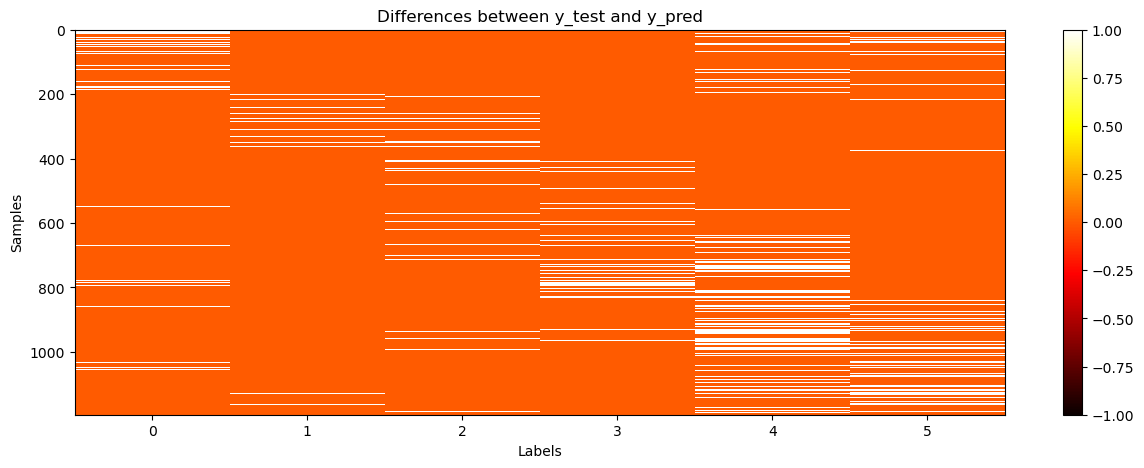

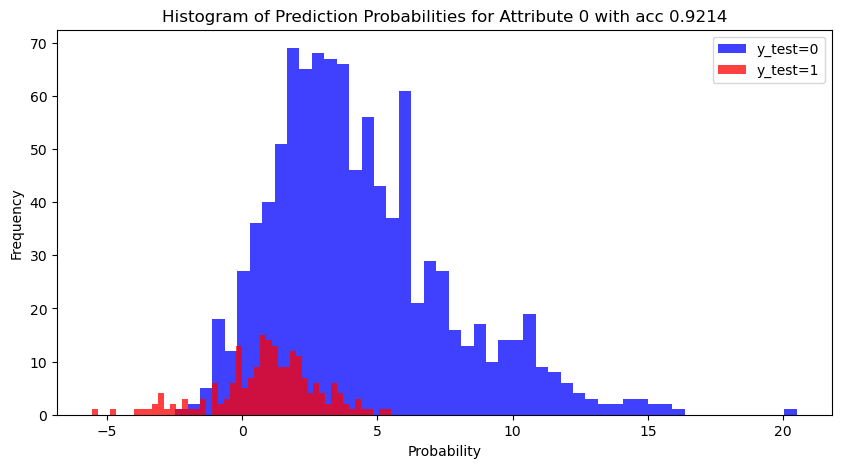

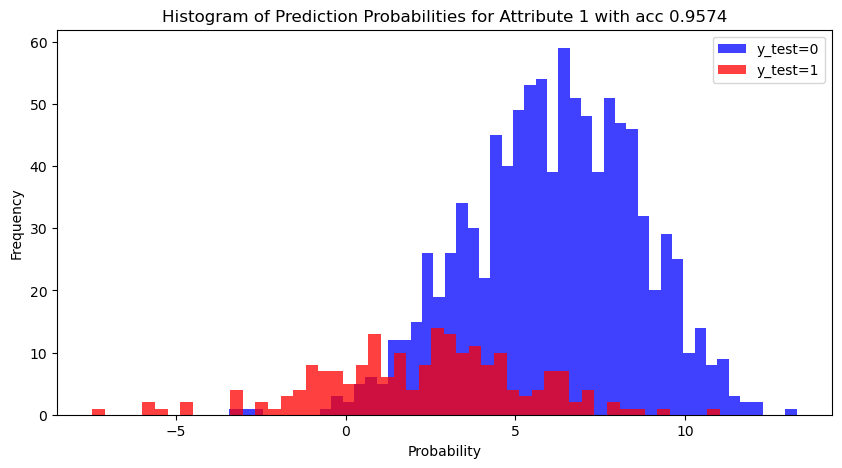

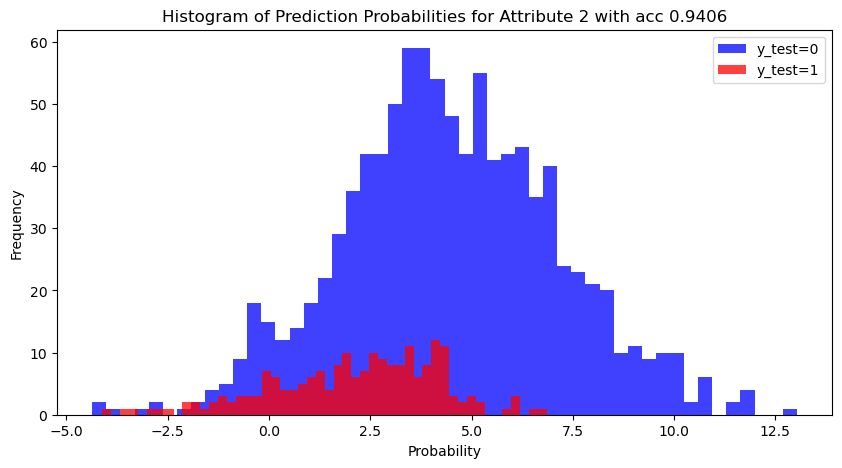

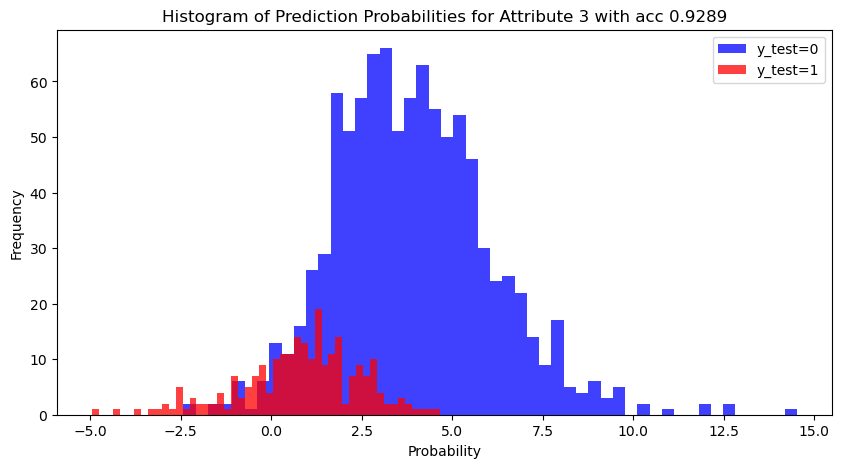

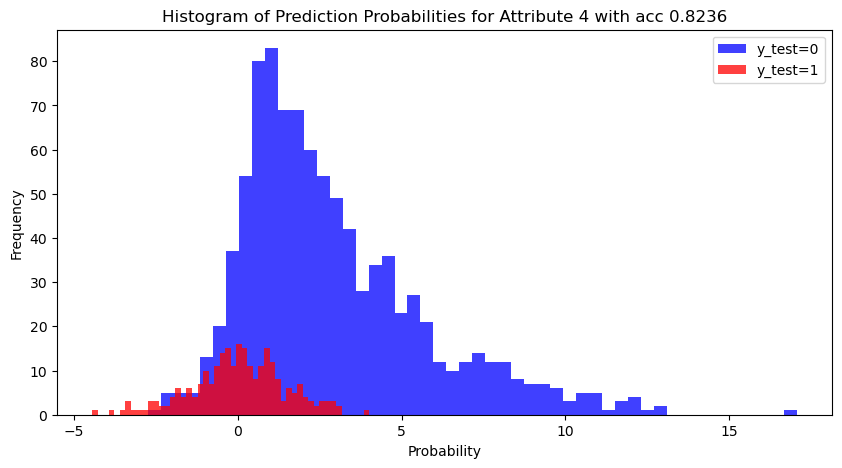

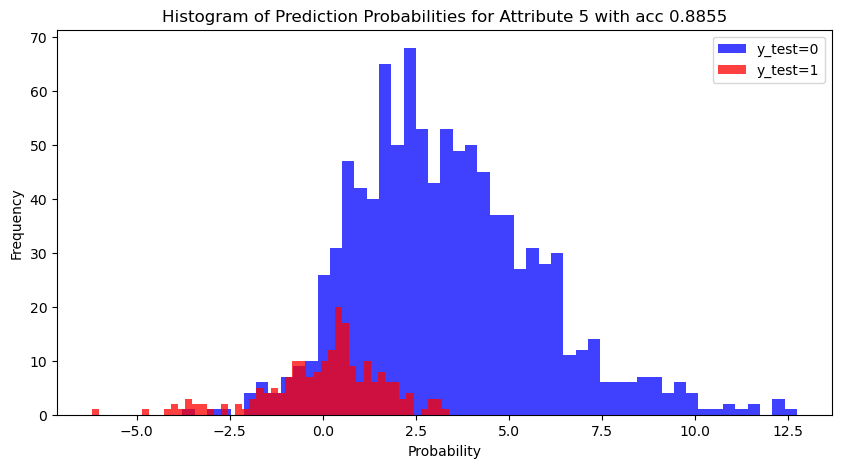

SA Mean: 0.6195652173913043, SA CI: 0.0156812946805142
Micro F1 Mean: 0.7395900734758157, Micro F1 CI: 0.010176617010521267
Macro F1 Mean: 0.7449039535672121, Macro F1 CI: 0.0089871721519284
Hamming Loss Mean: 0.08946488294314381, Hamming Loss CI: 0.003614152608792613
Label Accuracies Mean: [0.92084727 0.95930881 0.94147157 0.92837235 0.82664437 0.88656633]
Label Accuracies CI: (0.9105351170568561, array([0.00634546, 0.0043237 , 0.00549533, 0.0043237 , 0.0169165 ,
       0.00239836]))


In [65]:
read_rez("scene_softmax_extended_results_294x0_0.001_1000_cpu")

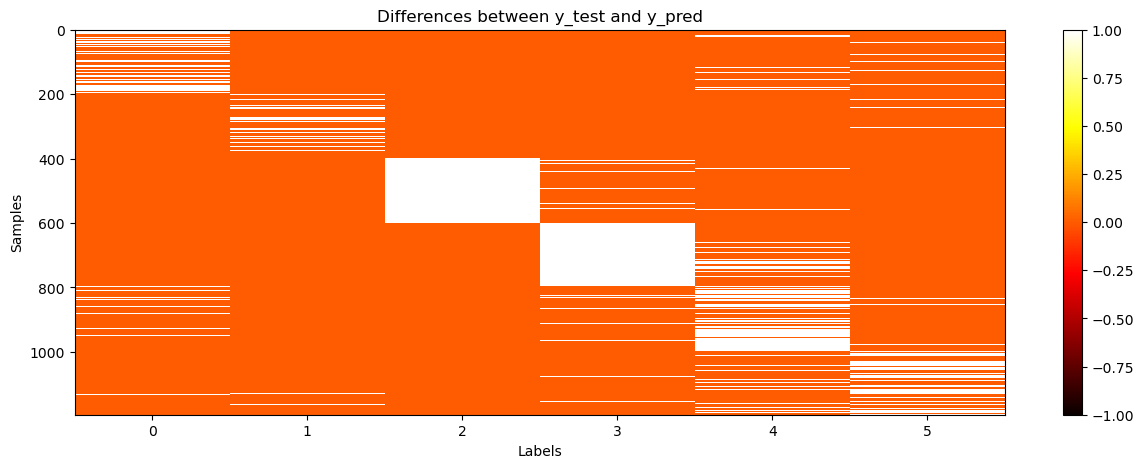

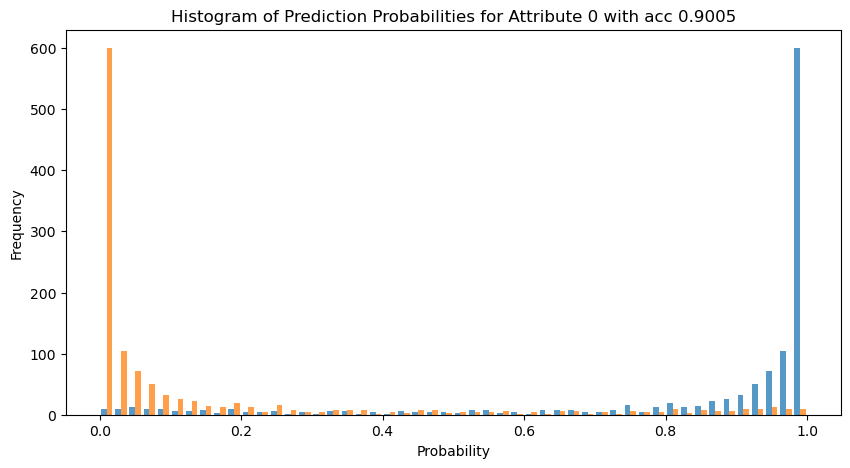

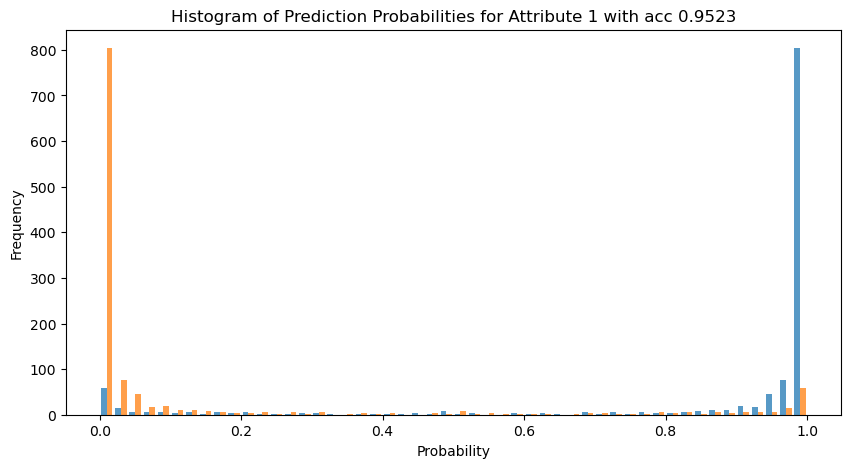

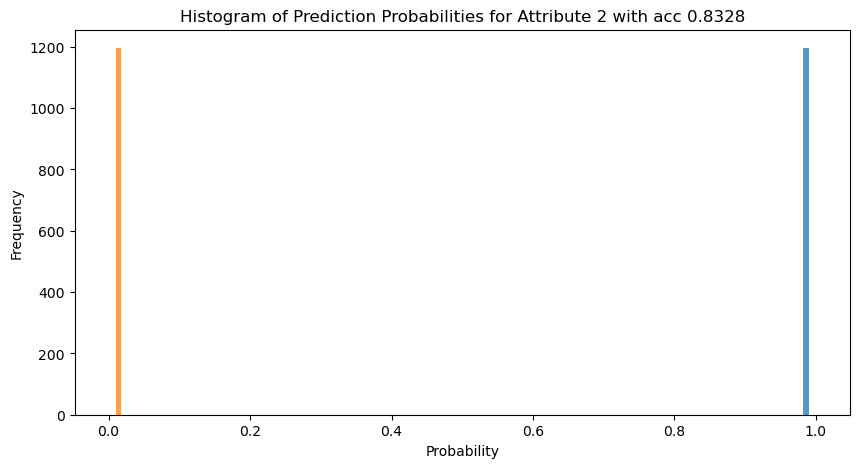

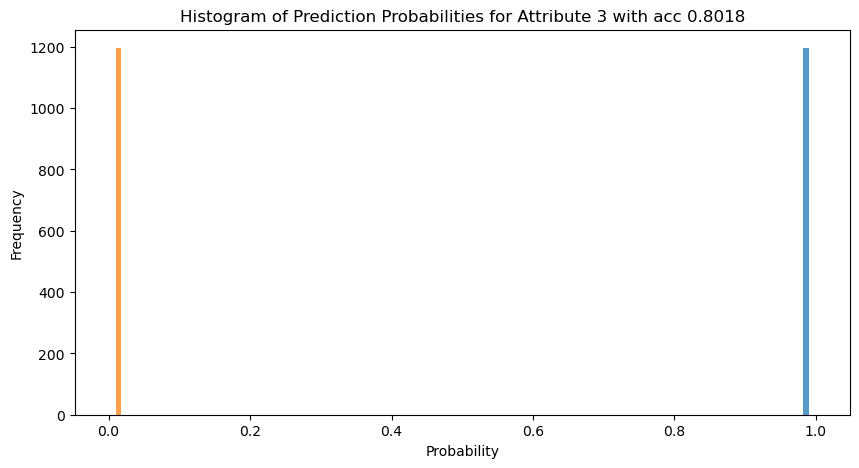

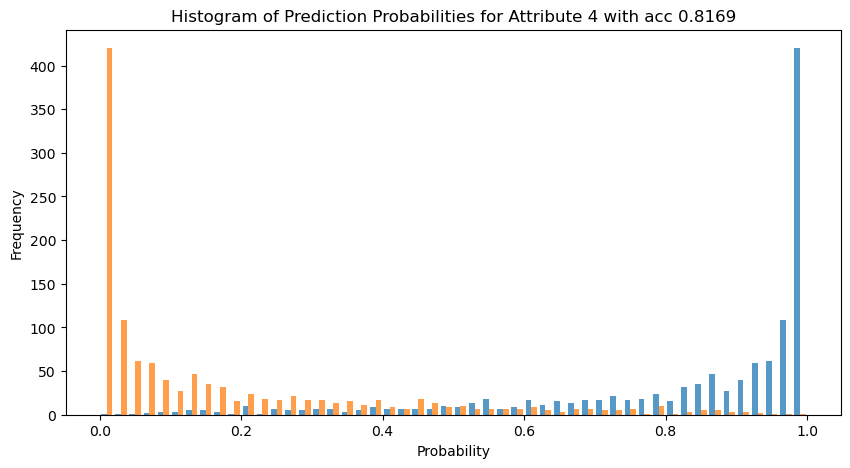

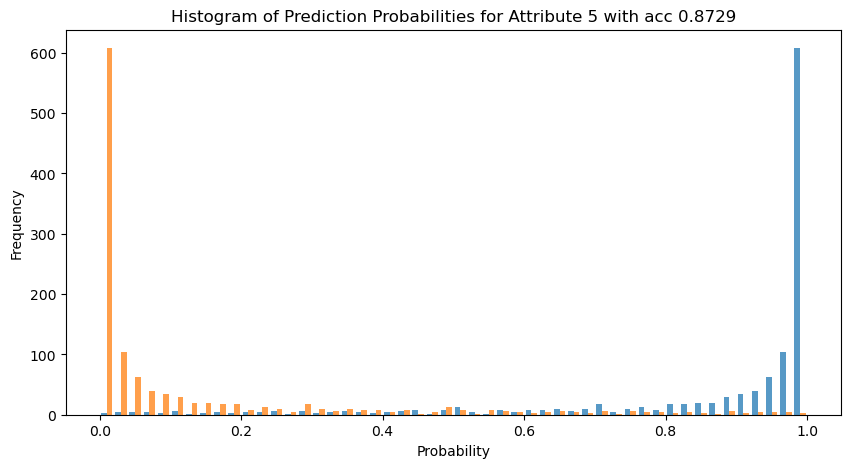

SA Mean: 0.2591973244147157, SA CI: 0.16485979785067684
Micro F1 Mean: 0.40290158019550865, Micro F1 CI: 0.1929768721351905
Macro F1 Mean: 0.3487337674816134, Macro F1 CI: 0.20046897769476296
Hamming Loss Mean: 0.14571720549981418, Hamming Loss CI: 0.027677250511430575
Label Accuracies Mean: [0.90050167 0.90802676 0.83277592 0.80183946 0.81354515 0.8690078 ]
Label Accuracies CI: (0.8542827945001857, array([0.00415408, 0.16106089, 0.        , 0.        , 0.00748887,
       0.00936588]))


In [ ]:
read_rez("scene_softmax_results_0.001_1000_cuda")

## VBLL Diag

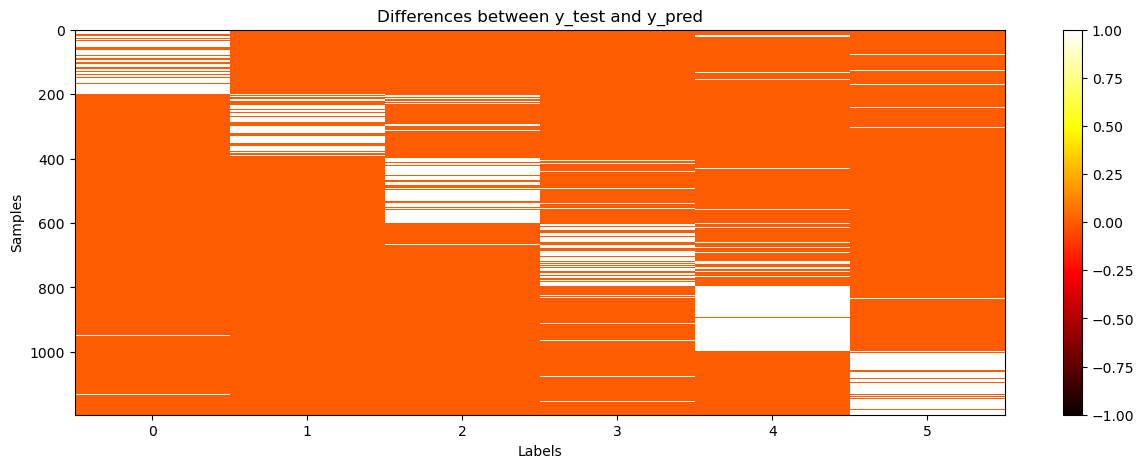

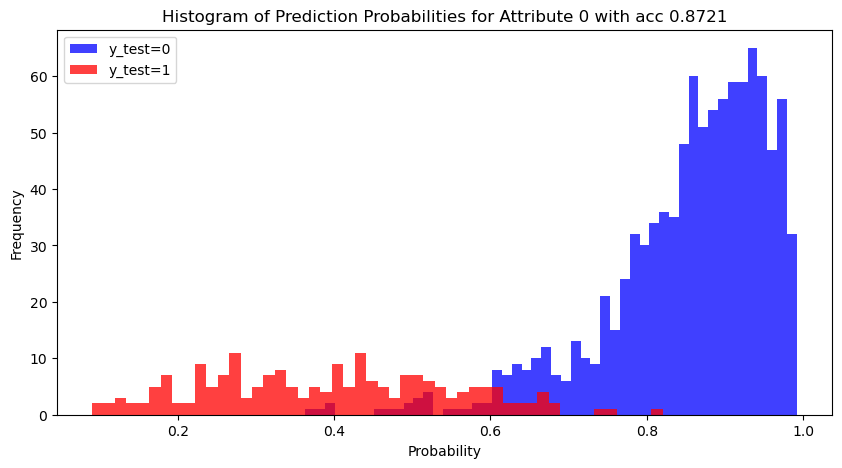

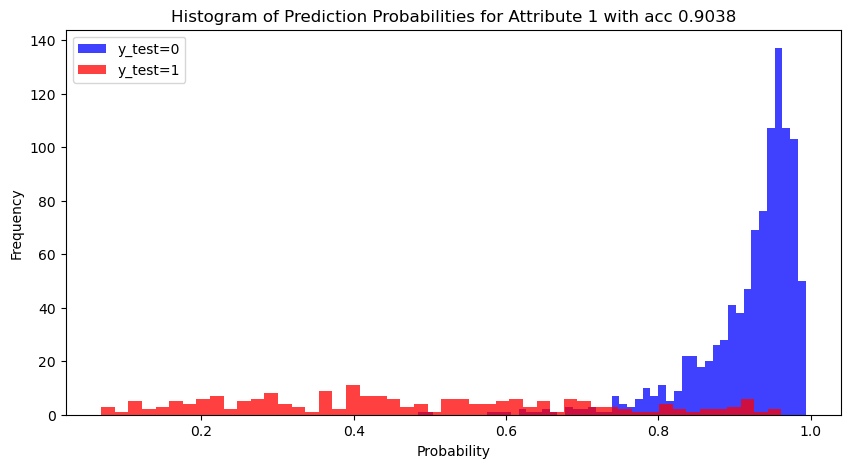

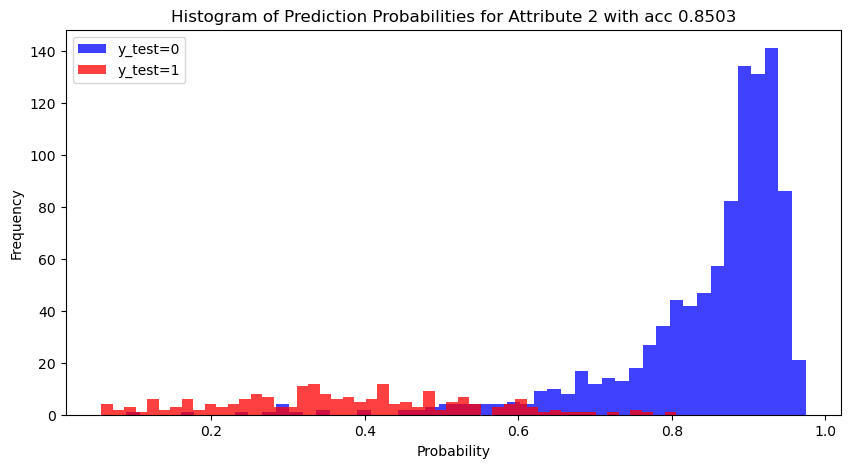

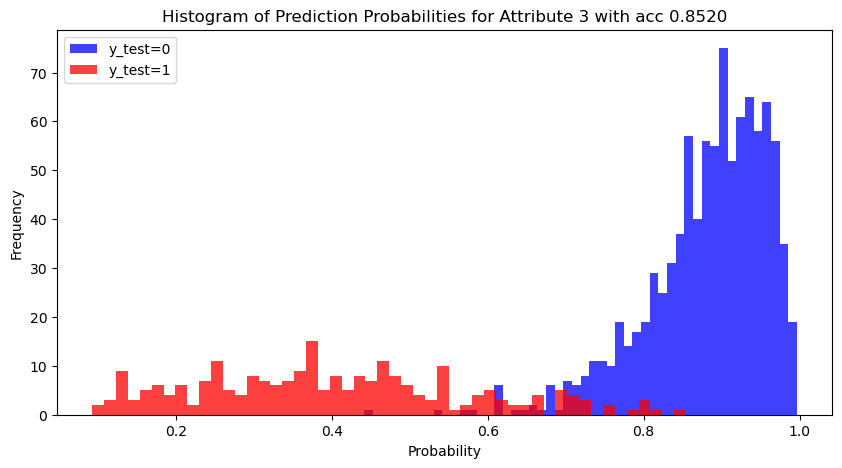

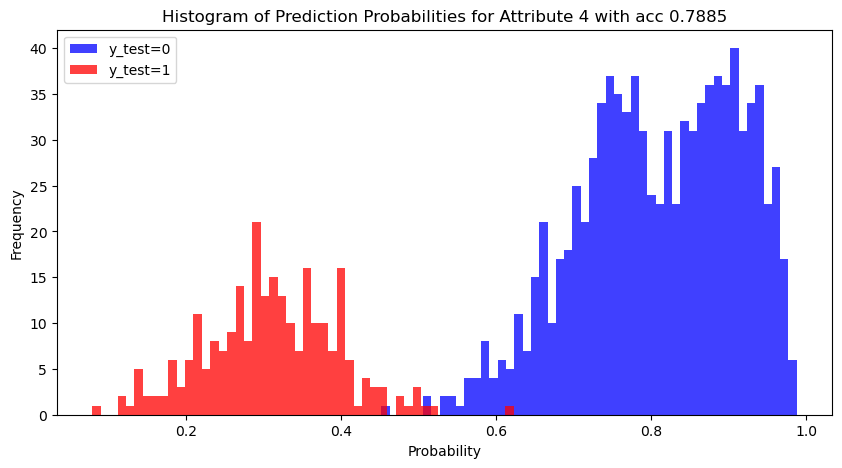

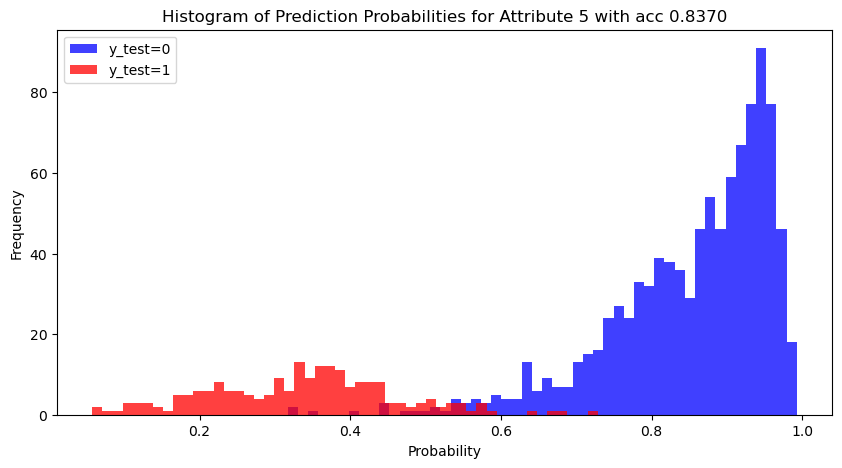

SA Mean: 0.18673355629877367, SA CI: 0.035330006999996055
Micro F1 Mean: 0.33008471701095204, Micro F1 CI: 0.04728113380814541
Macro F1 Mean: 0.32189095084670266, Macro F1 CI: 0.04044476179072678
Hamming Loss Mean: 0.14961910070605722, Hamming Loss CI: 0.006768841106242563
Label Accuracies Mean: [0.87151616 0.89799331 0.8525641  0.85535117 0.78901895 0.83584169]
Label Accuracies CI: (0.8503808992939429, array([0.0043237 , 0.02518275, 0.00634546, 0.01622219, 0.00119918,
       0.00479671]))


In [67]:
read_rez("scene_vbll_results_diagonal_1.0_0.001_1000_cuda")

## VBLL Diag One more layer

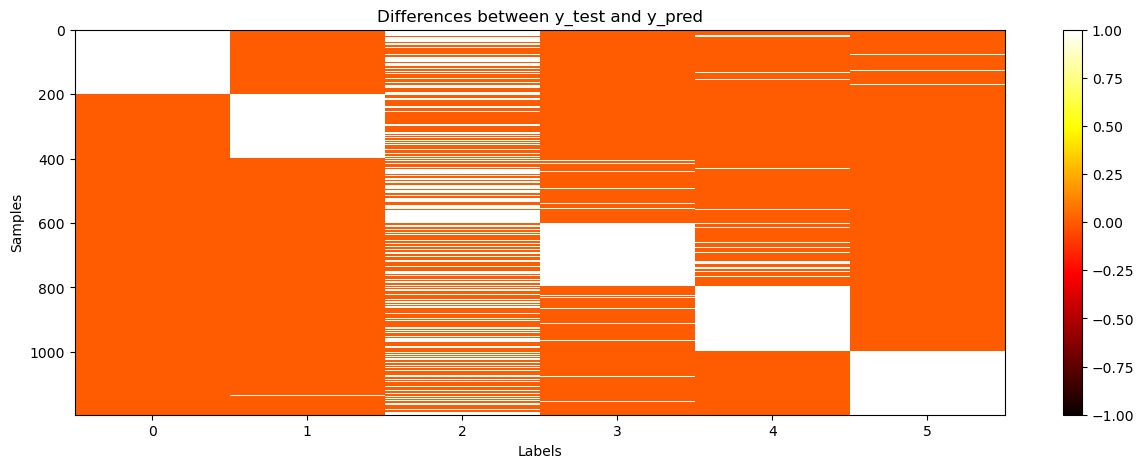

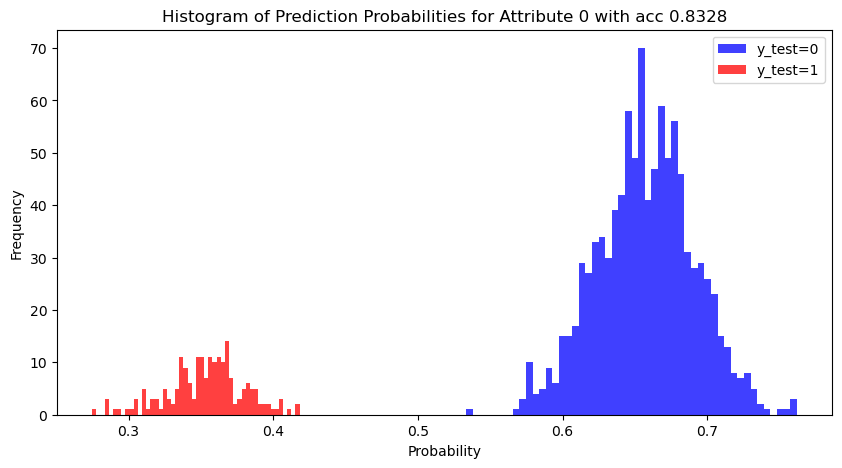

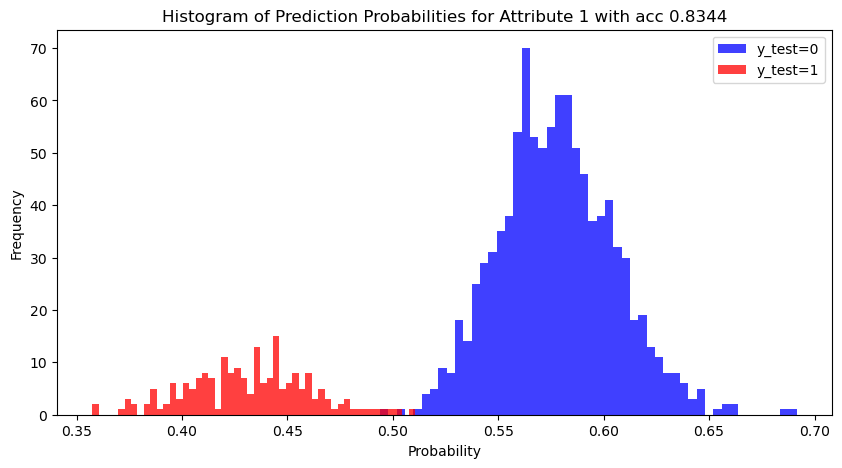

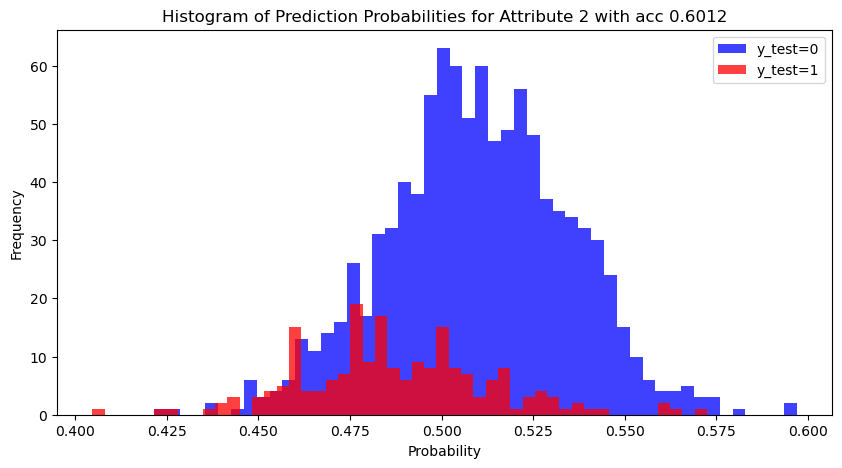

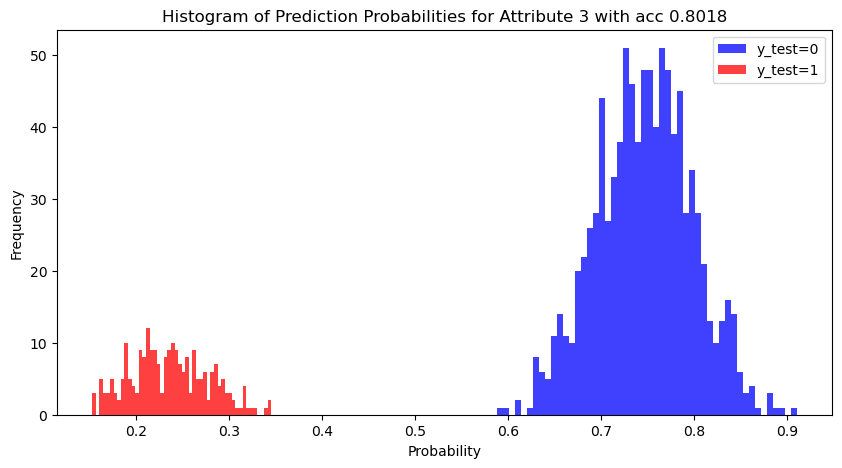

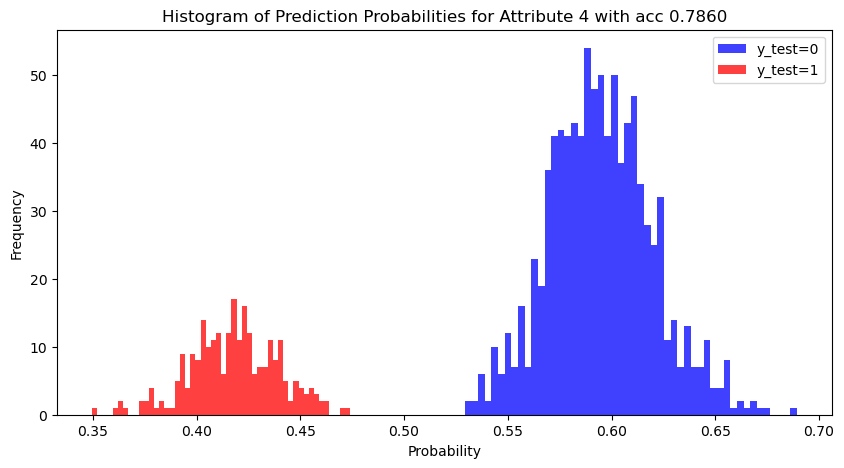

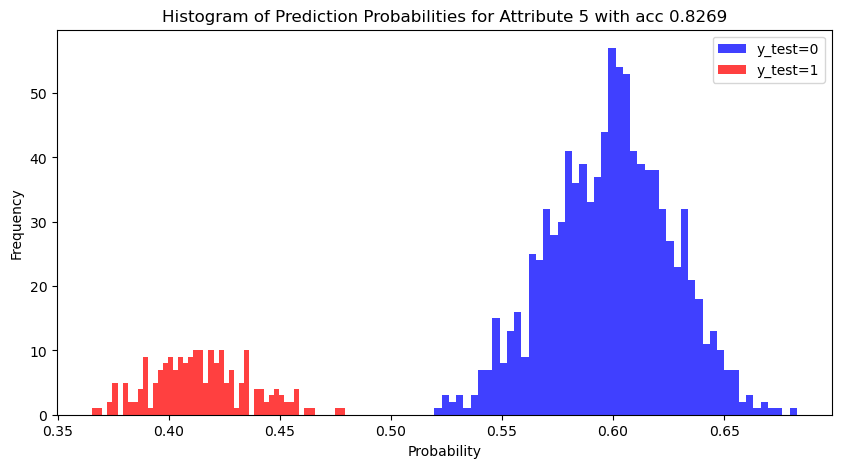

SA Mean: 0.08026755852842808, SA CI: 0.14414106527128911
Micro F1 Mean: 0.10463510337092126, Micro F1 CI: 0.11912088473285658
Macro F1 Mean: 0.039934998798714705, Macro F1 CI: 0.01761570161829099
Hamming Loss Mean: 0.24684132292827946, Hamming Loss CI: 0.09915324820038454
Label Accuracies Mean: [0.83277592 0.83305463 0.43896321 0.80183946 0.78539576 0.82692308]
Label Accuracies CI: (0.7531586770717205, array([0.00000000e+00, 4.32369984e-03, 5.88249347e-01, 0.00000000e+00,
       2.39835715e-03, 3.37778130e-16]))


In [68]:
read_rez("scene_vbll_extended_results_294x0_diagonal_1.0_0.001_1000_cuda")

## VBLL Low Rank

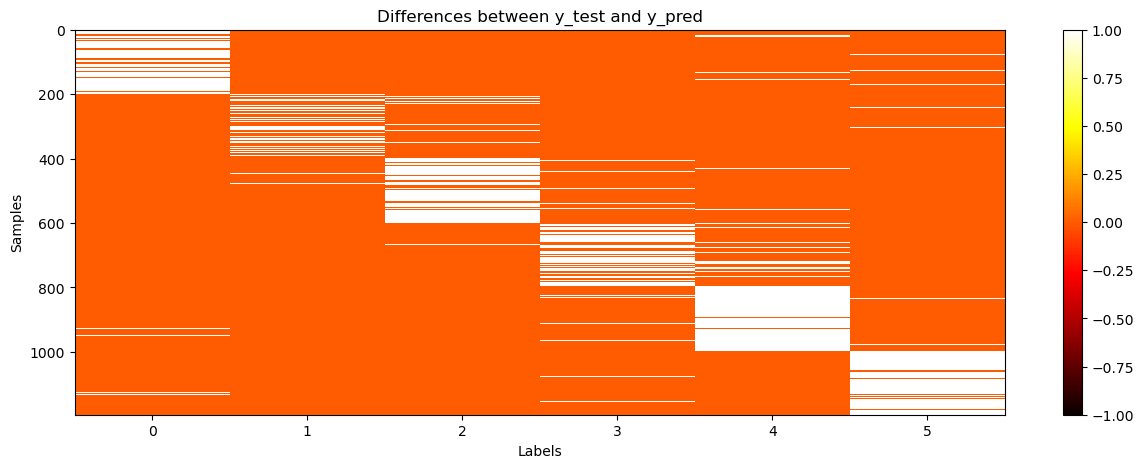

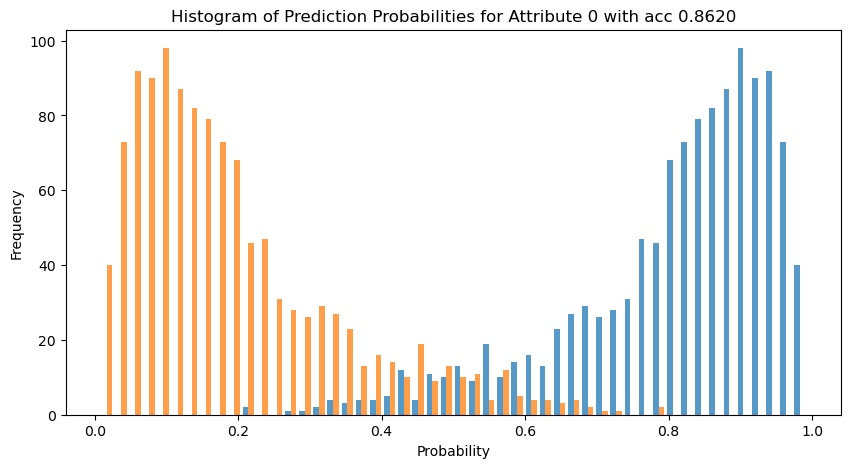

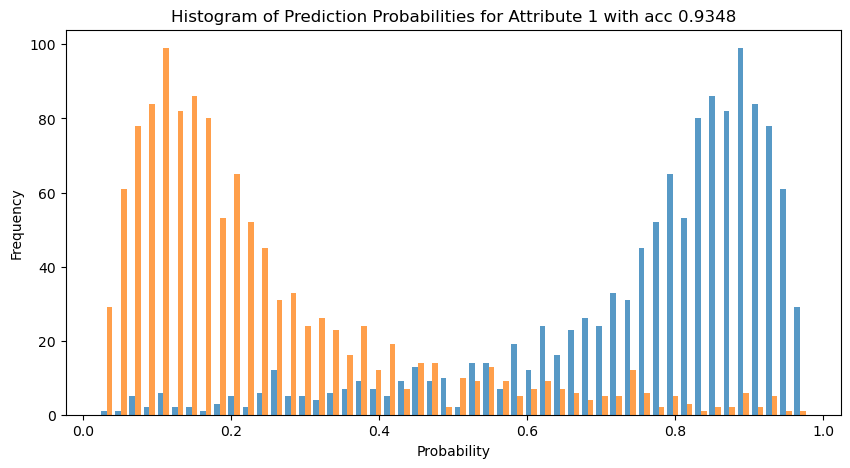

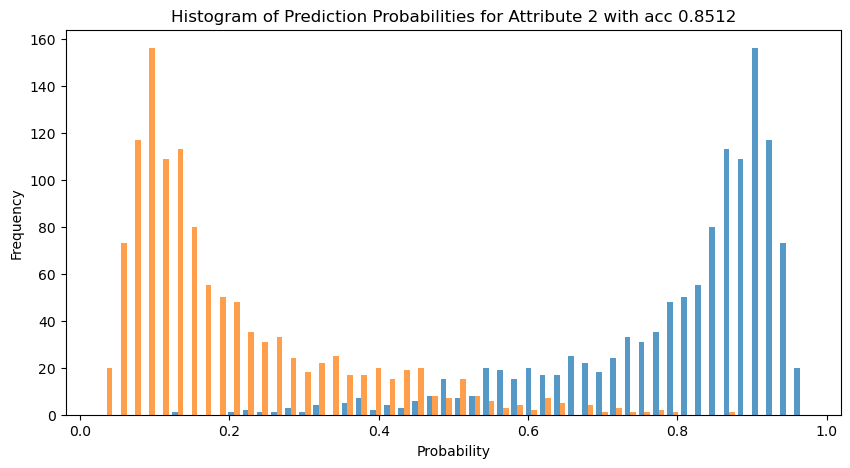

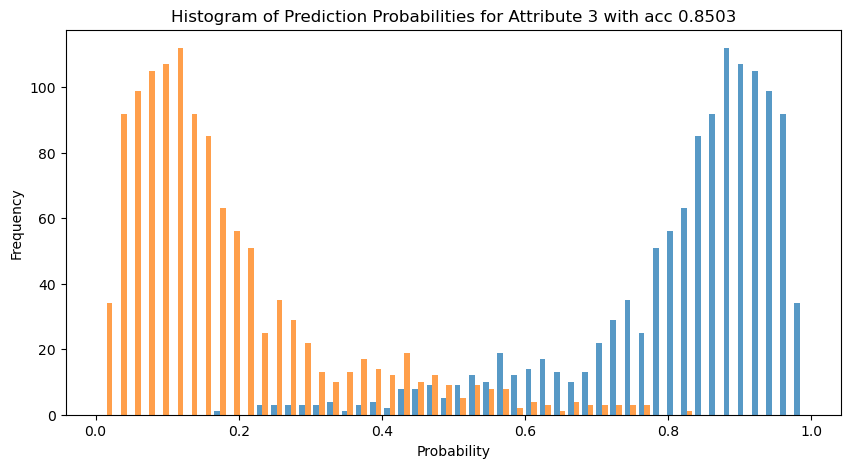

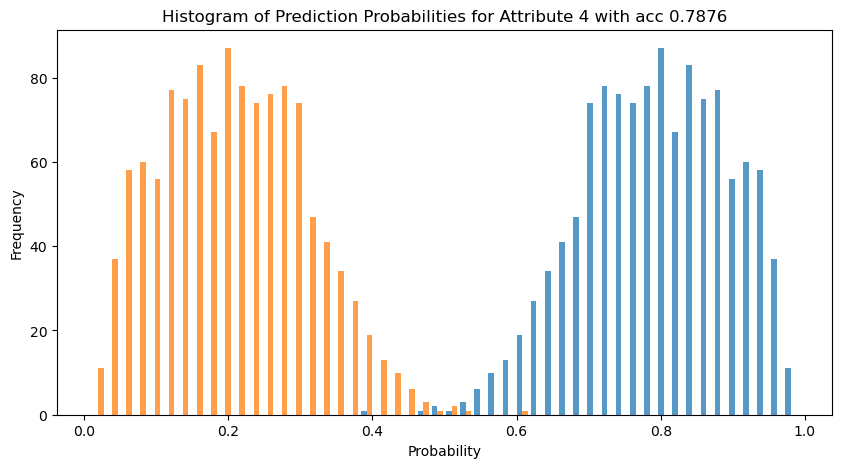

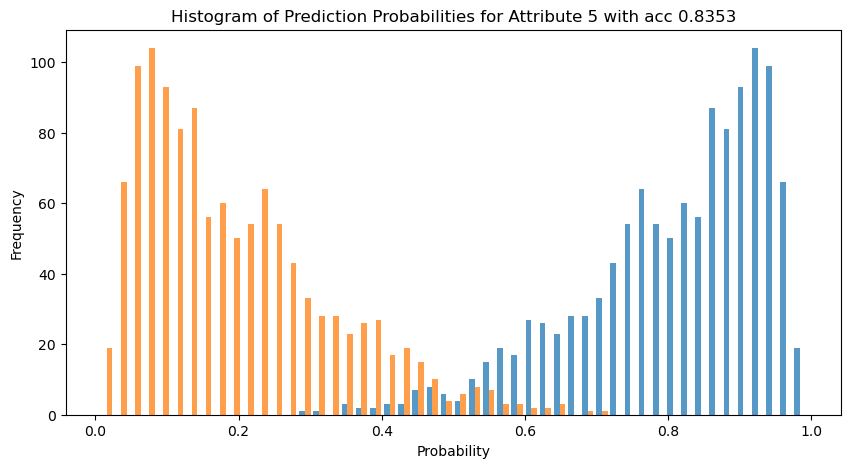

SA Mean: 0.19035674470457078, SA CI: 0.056399651730497054
Micro F1 Mean: 0.33166334767944466, Micro F1 CI: 0.08087806945532643
Macro F1 Mean: 0.31736767932334886, Macro F1 CI: 0.06211313093840208
Hamming Loss Mean: 0.1501300631735414, Hamming Loss CI: 0.008841542184044185
Label Accuracies Mean: [0.86761427 0.91137124 0.85172798 0.84866221 0.78734671 0.83249721]
Label Accuracies CI: (0.8498699368264586, array([0.01351406, 0.05104615, 0.0043237 , 0.01903637, 0.00119918,
       0.0086474 ]))


In [ ]:
read_rez("scene_vbll_results_lowrank_1.0_0.001_1000_cuda")

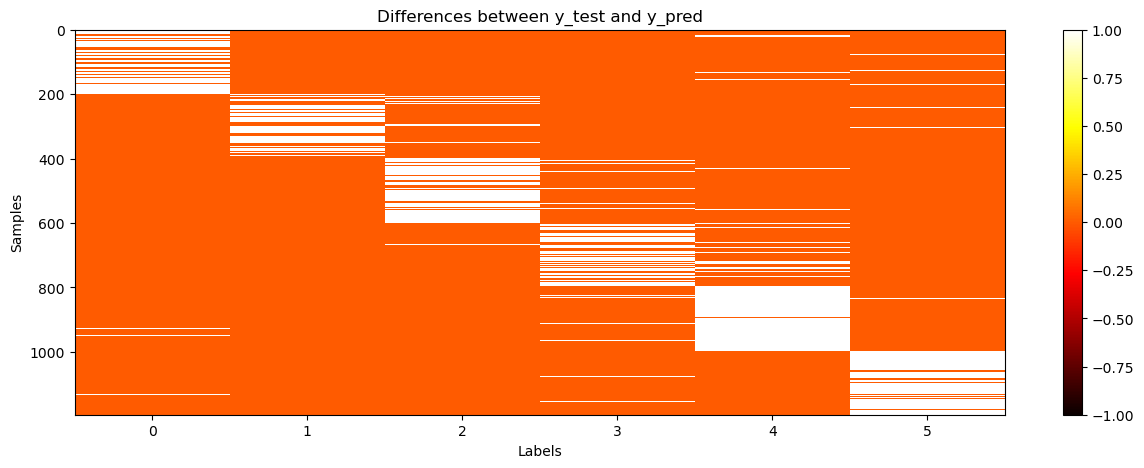

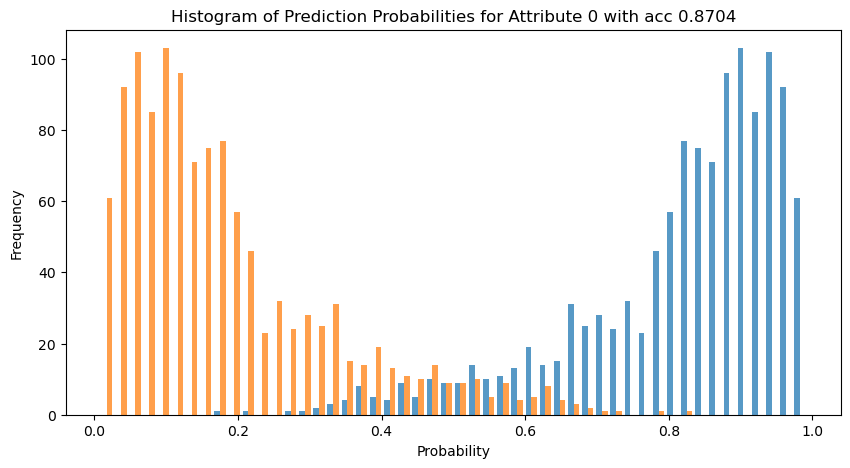

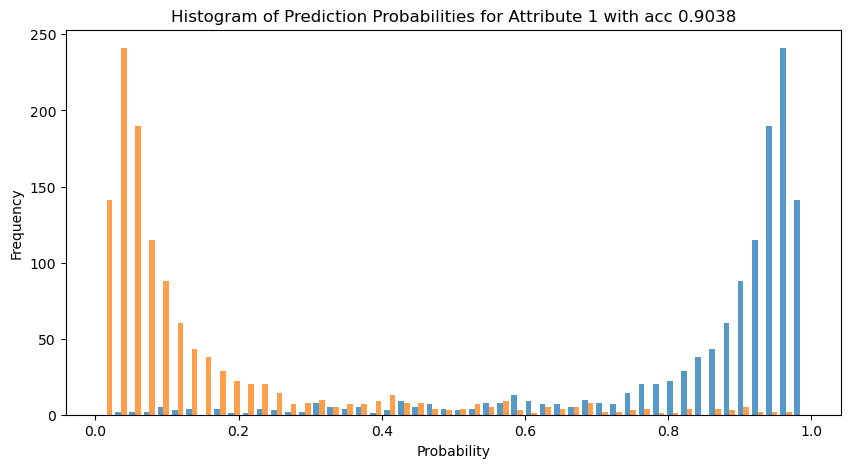

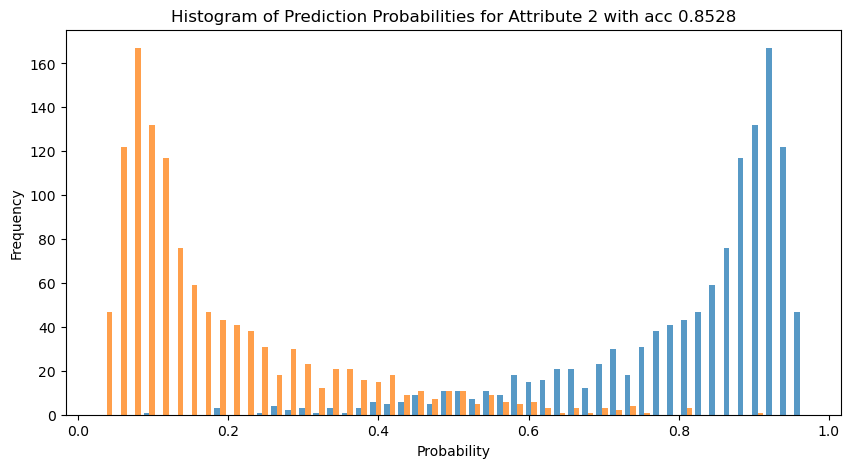

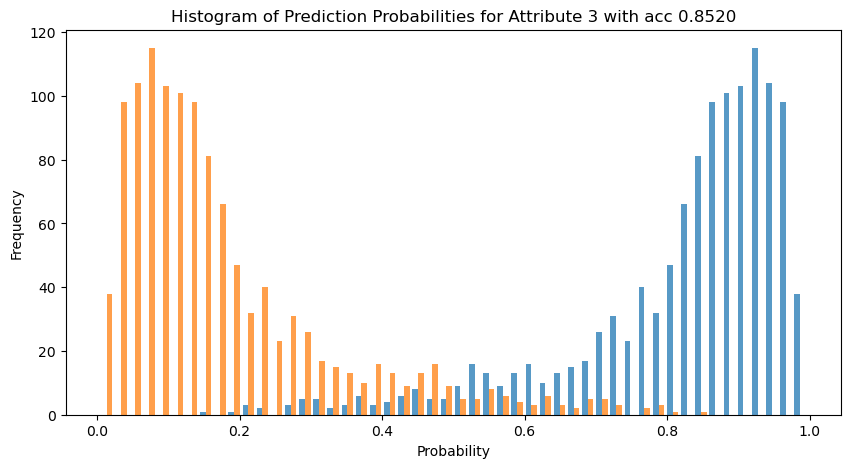

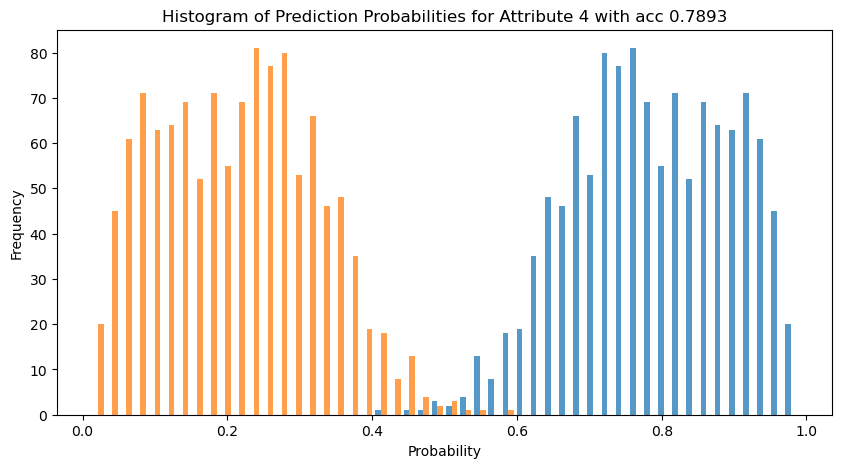

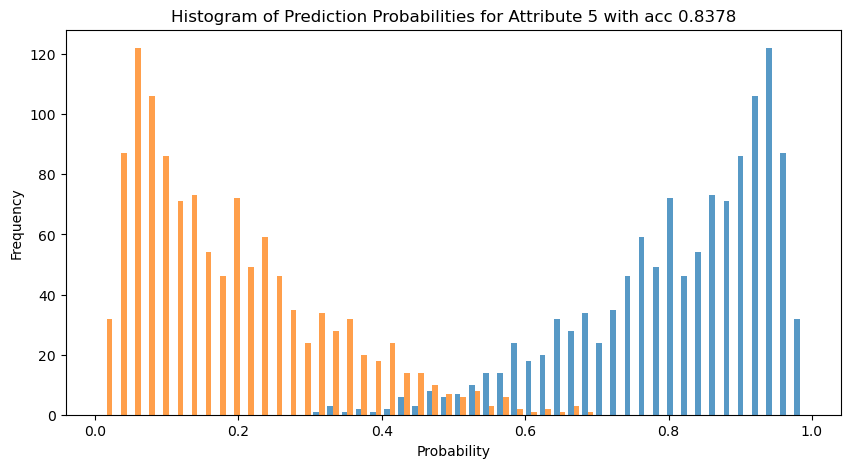

SA Mean: 0.19091415830546266, SA CI: 0.004323699843209199
Micro F1 Mean: 0.3317843936283849, Micro F1 CI: 0.018882531318648598
Macro F1 Mean: 0.32243923158020454, Macro F1 CI: 0.01652532817681942
Hamming Loss Mean: 0.14966555183946487, Hamming Loss CI: 0.002161849921604589
Label Accuracies Mean: [0.86789298 0.90830546 0.85144928 0.84866221 0.78790412 0.83779264]
Label Accuracies CI: (0.850334448160535, array([0.01648598, 0.01572708, 0.0098157 , 0.01263413, 0.0043237 ,
       0.00415408]))


In [ ]:
read_rez("scene_vbll_results_dense_1.0_0.001_1000_cuda")

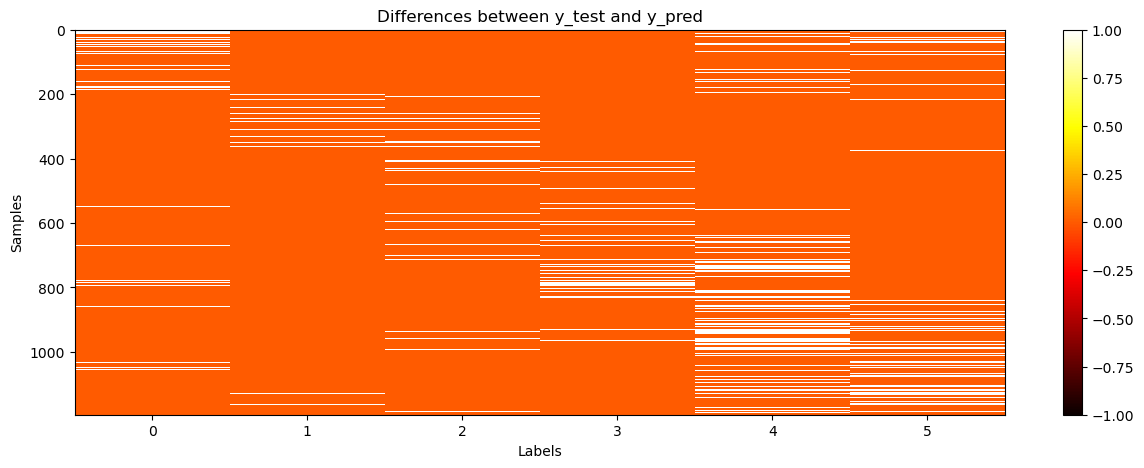

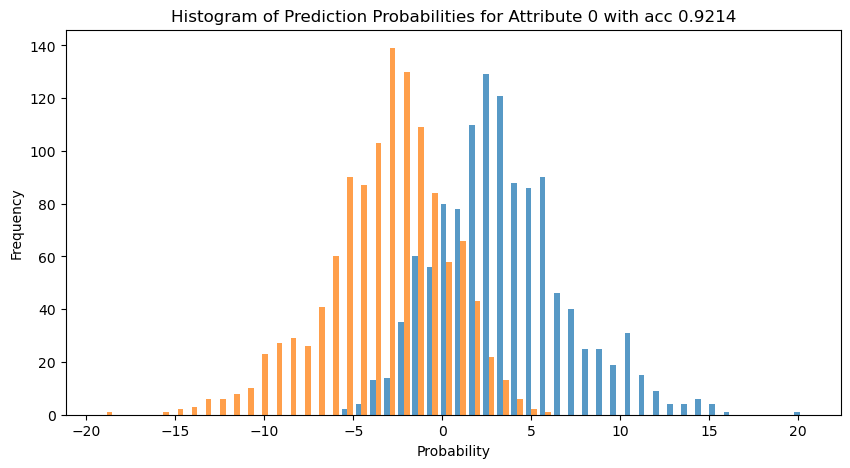

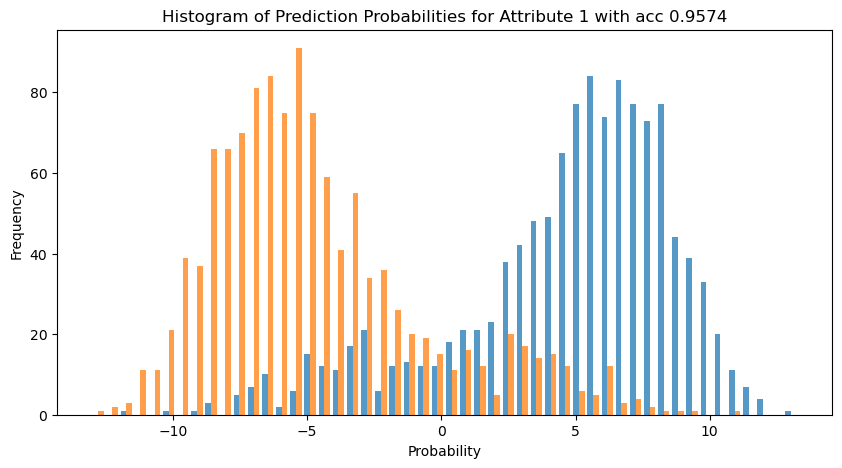

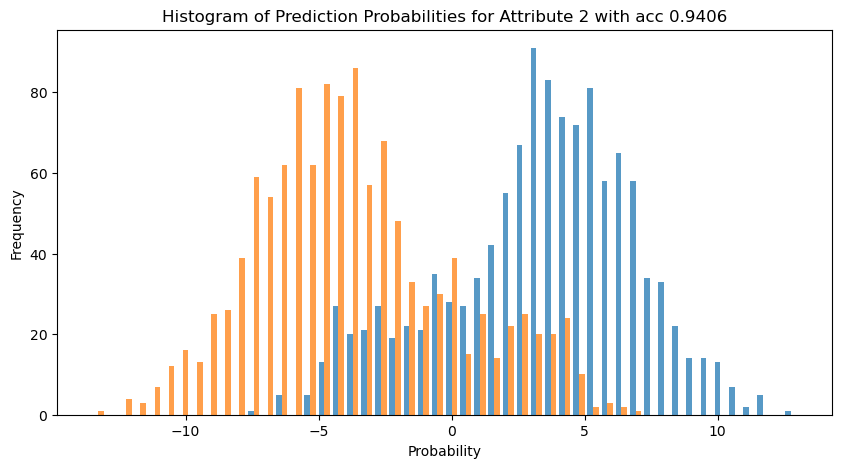

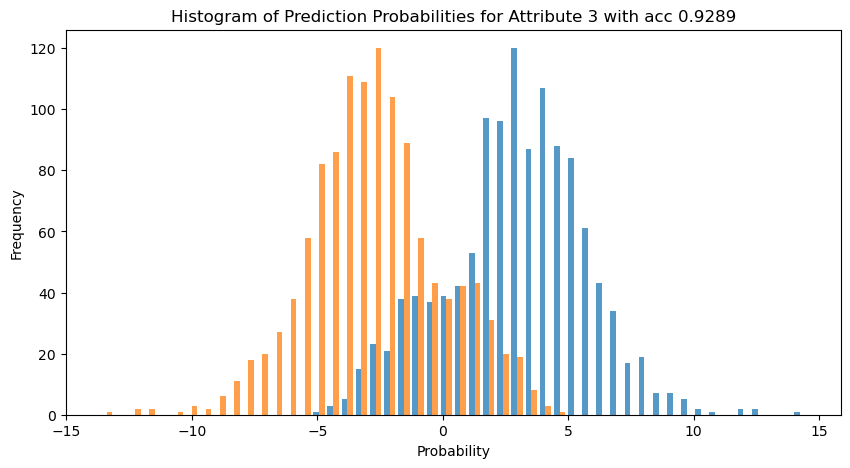

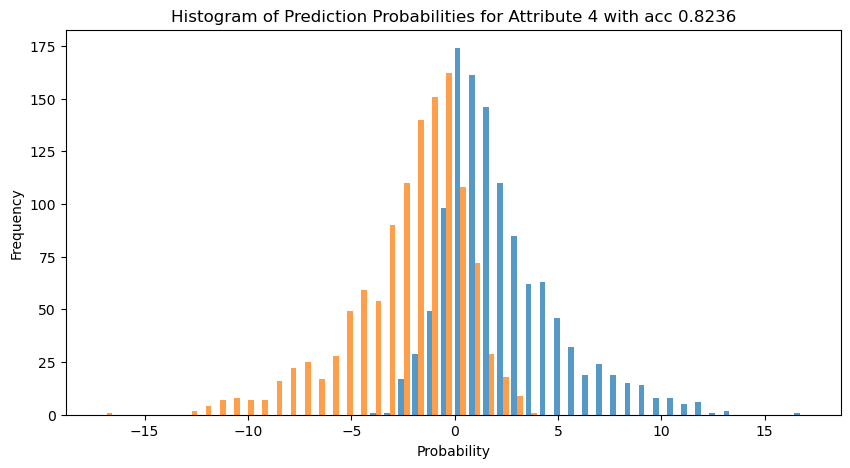

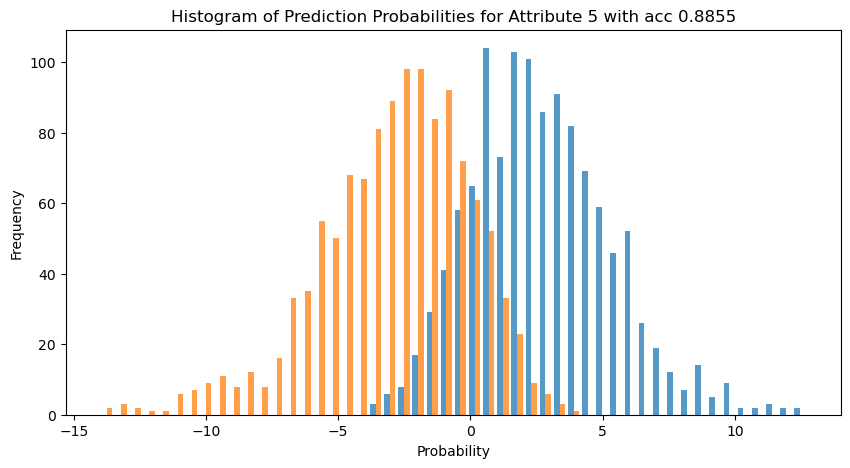

SA Mean: 0.6195652173913043, SA CI: 0.0156812946805142
Micro F1 Mean: 0.7395900734758157, Micro F1 CI: 0.010176617010521267
Macro F1 Mean: 0.7449039535672121, Macro F1 CI: 0.0089871721519284
Hamming Loss Mean: 0.08946488294314381, Hamming Loss CI: 0.003614152608792613
Label Accuracies Mean: [0.92084727 0.95930881 0.94147157 0.92837235 0.82664437 0.88656633]
Label Accuracies CI: (0.9105351170568561, array([0.00634546, 0.0043237 , 0.00549533, 0.0043237 , 0.0169165 ,
       0.00239836]))


In [ ]:
read_rez("scene_softmax_extended_results_294x0_0.001_1000_cpu")

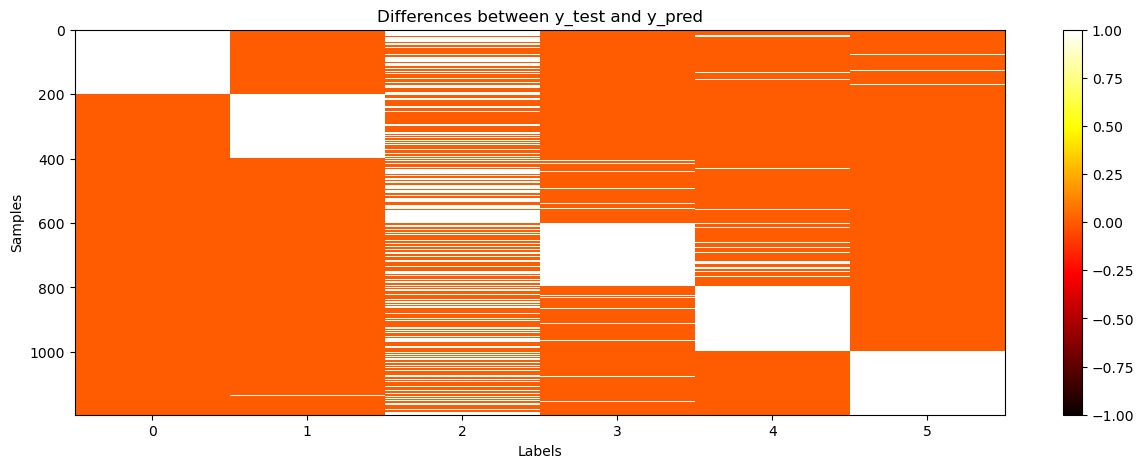

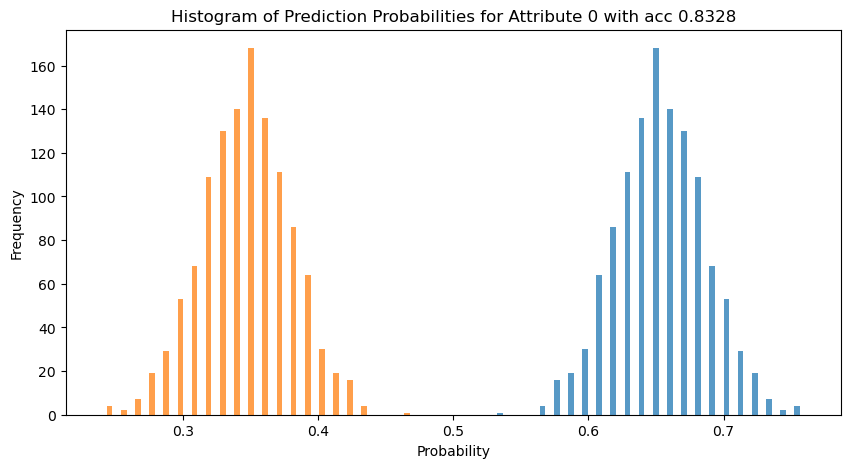

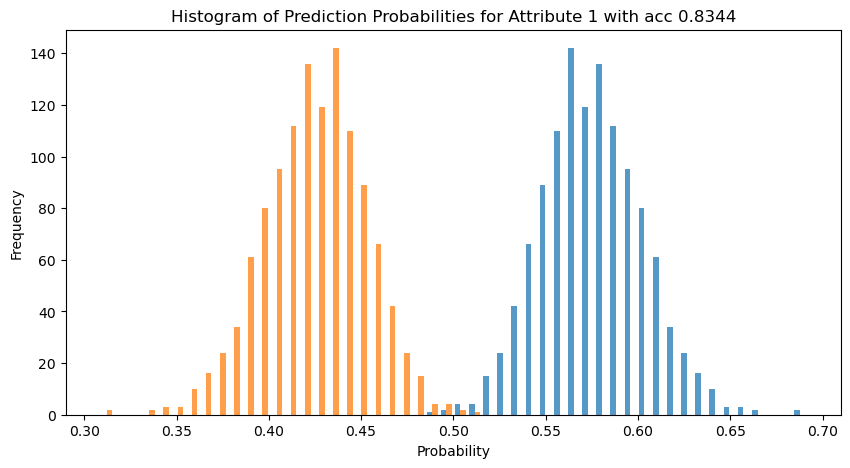

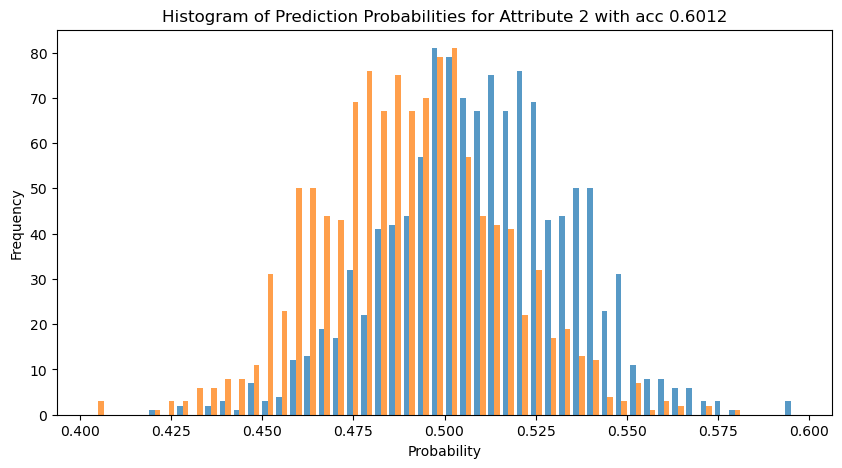

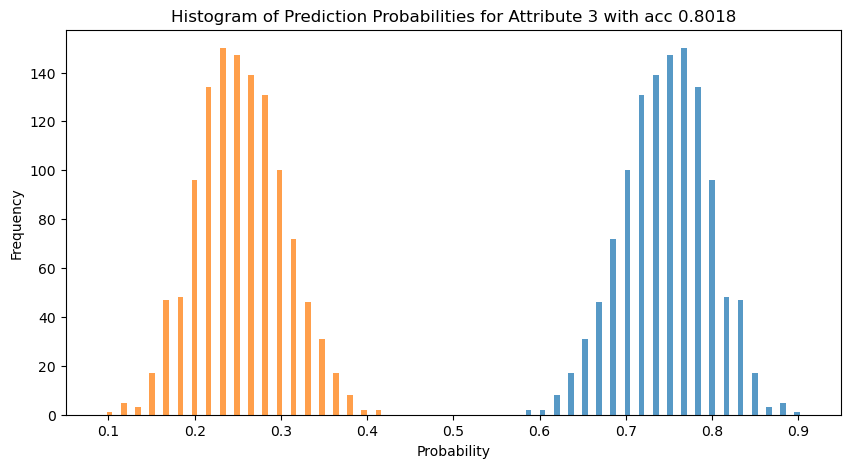

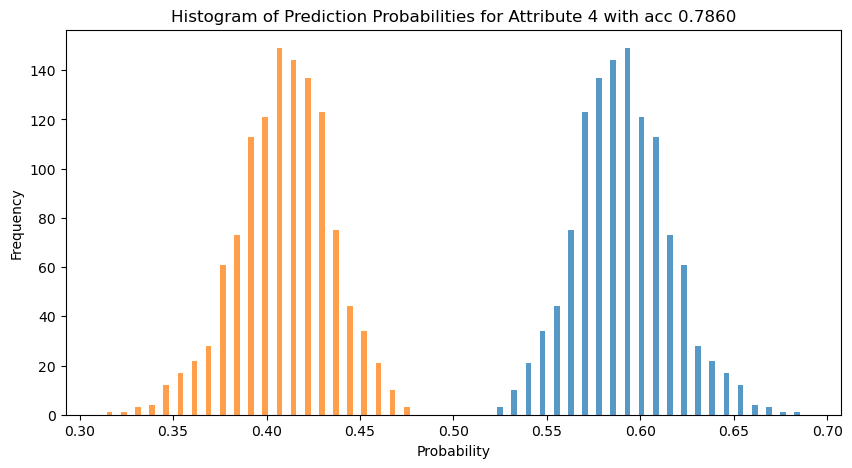

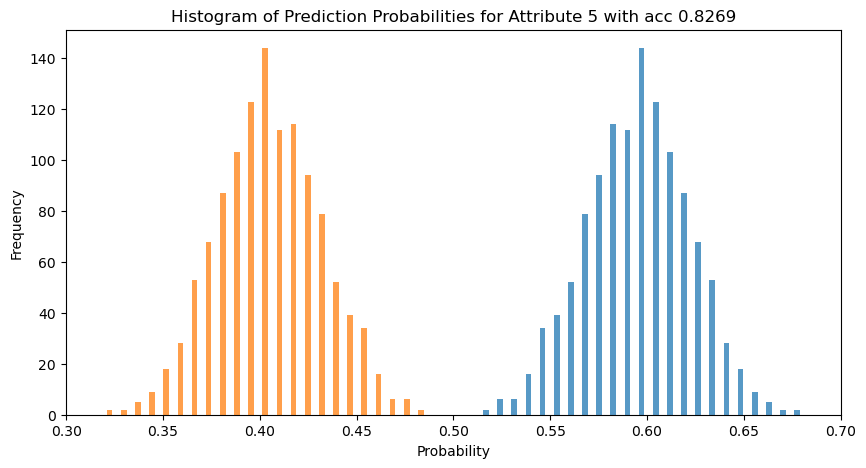

SA Mean: 0.08026755852842808, SA CI: 0.14414106527128911
Micro F1 Mean: 0.10463510337092126, Micro F1 CI: 0.11912088473285658
Macro F1 Mean: 0.039934998798714705, Macro F1 CI: 0.01761570161829099
Hamming Loss Mean: 0.24684132292827946, Hamming Loss CI: 0.09915324820038454
Label Accuracies Mean: [0.83277592 0.83305463 0.43896321 0.80183946 0.78539576 0.82692308]
Label Accuracies CI: (0.7531586770717205, array([0.00000000e+00, 4.32369984e-03, 5.88249347e-01, 0.00000000e+00,
       2.39835715e-03, 3.37778130e-16]))


In [ ]:
read_rez("scene_vbll_extended_results_294x0_diagonal_1.0_0.001_1000_cuda")

![title](scene_softmax_results_0.001_1000_cuda.png)

![title](scene_vbll_results_diagonal_1.0_0.001_1000_cuda.png)

![title](scene_vbll_results_lowrank_1.0_0.001_1000_cuda.png)

![title](scene_vbll_results_dense_1.0_0.001_1000_cuda.png)

![title](scene_softmax_extended_results_294x0_0.001_1000_cpu.png)

![title](scene_vbll_extended_results_294x0_diagonal_1.0_0.001_1000_cuda.png)